# Pr√©parez des donn√©es pour un organisme de sant√© publique

## 0 - Rappel du sujet

L'agence Sant√© publique France souhaite am√©liorer sa base de donn√©es Open Food Facts, et fait appel aux services de votre entreprise. Cette base de donn√©es open source est mise √† la disposition de particuliers, et d‚Äôorganisations afin de leur permettre de conna√Ætre la qualit√© nutritionnelle de produits. 

Aujourd‚Äôhui, pour ajouter un produit √† la base de donn√©es d'Open Food Facts, il est n√©cessaire de remplir de nombreux champs textuels et num√©riques, ce qui peut conduire √† des erreurs de saisie et √† des valeurs manquantes dans la base. 

L‚Äôagence Sant√© publique France confie √† votre entreprise la cr√©ation d‚Äôun syst√®me de suggestion ou d‚Äôauto-compl√©tion pour aider les usagers √† remplir plus efficacement la base de donn√©es. Dans un premier temps, vous devez vous concentrer sur la prise en main des donn√©es, et d‚Äôabord les nettoyer et les explorer.

Afin de simplifier ton approche, je te propose de commencer par √©tablir la faisabilit√© de sugg√©rer les valeurs manquantes pour une variable dont plus de 50% des valeurs sont manquantes.

Voici les diff√©rentes √©tapes pour nettoyer et explorer les donn√©es : 

1) Traiter le jeu de donn√©es

Rep√©rer des variables pertinentes pour les traitements √† venir, et n√©cessaires pour sugg√©rer des valeurs manquantes,.
Nettoyer les donn√©es en :
mettant en √©vidence les √©ventuelles valeurs manquantes parmi les variables pertinentes s√©lectionn√©es, avec au moins 3 m√©thodes de traitement adapt√©es aux variables concern√©es,
identifiant et en traitant les √©ventuelles valeurs aberrantes de chaque variable.
Automatiser ces traitements pour √©viter de r√©p√©ter ces op√©rations
Attention, le client souhaite que le programme fonctionne si la base de donn√©es est l√©g√®rement modifi√©e (ajout d‚Äôentr√©es, par xmple) !

 

2) Tout au long de l‚Äôanalyse, produire des visualisations afin de mieux comprendre les donn√©es. Effectuer une analyse univari√©e pour chaque variable int√©ressante, afin de synth√©tiser son comportement.

## 1 - Pr√©parer le dataframe

In [4]:
import numpy as np

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FuncFormatter
import scipy
from scipy import stats
import scipy.stats as st

import statsmodels
import statsmodels.api as sm
#!pip install missingno
import missingno as msno

import sklearn
from sklearn.experimental import enable_iterative_imputer  # N√©cessaire pour activer IterativeImputer
from sklearn.impute import IterativeImputer

from sklearn.impute import KNNImputer
# Encodage des variables cat√©gorielles avec LabelEncoder avant d'utiliser KNNImputer
from sklearn.preprocessing import LabelEncoder

print("numpy version", np.__version__)
print("pandas version", pd.__version__)
print("matplotlib version", matplotlib.__version__)
print("seaborn version", sns.__version__)
print("scipy version", scipy.__version__)
print("statsmodels version", statsmodels.__version__)
print("missingno version", msno.__version__)

print("sklearn version", sklearn.__version__)

pd.options.display.max_rows = 200
pd.options.display.max_columns = 100

numpy version 1.26.4
pandas version 2.1.4
matplotlib version 3.8.0
seaborn version 0.13.2
scipy version 1.11.4
statsmodels version 0.14.0
missingno version 0.5.2
sklearn version 1.2.2


In [5]:
# Charger le fichier de donn√©es
data = pd.read_csv("C:/Users/admin/Documents/Projets/Projet_3/openfoodfacts/fr.openfoodfacts.org.products.csv", sep='\t', low_memory=False)
data.head()

code                                                url  \
0  0000000003087  http://world-fr.openfoodfacts.org/produit/0000...   
1  0000000004530  http://world-fr.openfoodfacts.org/produit/0000...   
2  0000000004559  http://world-fr.openfoodfacts.org/produit/0000...   
3  0000000016087  http://world-fr.openfoodfacts.org/produit/0000...   
4  0000000016094  http://world-fr.openfoodfacts.org/produit/0000...   

                      creator   created_t      created_datetime  \
0  openfoodfacts-contributors  1474103866  2016-09-17T09:17:46Z   
1             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
2             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
3             usda-ndb-import  1489055731  2017-03-09T10:35:31Z   
4             usda-ndb-import  1489055653  2017-03-09T10:34:13Z   

  last_modified_t last_modified_datetime                    product_name  \
0      1474103893   2016-09-17T09:18:13Z              Farine de bl√© noir   
1      1489069957   2017-03-09T14:32:37Z  Banana Chips Sweetened (Whole)   
2      1489069957   2017-03-09T14:32:37Z                         Peanuts   
3      1489055731   2017-03-09T10:35:31Z          Organic Salted Nut Mix   
4      1489055653   2017-03-09T10:34:13Z                 Organic Polenta   

  generic_name quantity packaging packaging_tags           brands  \
0          NaN      1kg       NaN            NaN  Ferme t'y R'nao   
1          NaN      NaN       NaN            NaN              NaN   
2          NaN      NaN       NaN            NaN   Torn & Glasser   
3          NaN      NaN       NaN            NaN        Grizzlies   
4          NaN      NaN       NaN            NaN   Bob's Red Mill   

       brands_tags categories categories_tags categories_fr origins  \
0  ferme-t-y-r-nao        NaN             NaN           NaN     NaN   
1              NaN        NaN             NaN           NaN     NaN   
2     torn-glasser        NaN             NaN           NaN     NaN   
3        grizzlies        NaN             NaN           NaN     NaN   
4   bob-s-red-mill        NaN             NaN           NaN     NaN   

  origins_tags manufacturing_places manufacturing_places_tags labels  \
0          NaN                  NaN                       NaN    NaN   
1          NaN                  NaN                       NaN    NaN   
2          NaN                  NaN                       NaN    NaN   
3          NaN                  NaN                       NaN    NaN   
4          NaN                  NaN                       NaN    NaN   

  labels_tags labels_fr emb_codes emb_codes_tags first_packaging_code_geo  \
0         NaN       NaN       NaN            NaN                      NaN   
1         NaN       NaN       NaN            NaN                      NaN   
2         NaN       NaN       NaN            NaN                      NaN   
3         NaN       NaN       NaN            NaN                      NaN   
4         NaN       NaN       NaN            NaN                      NaN   

  cities cities_tags purchase_places stores countries    countries_tags  \
0    NaN         NaN             NaN    NaN     en:FR         en:france   
1    NaN         NaN             NaN    NaN        US  en:united-states   
2    NaN         NaN             NaN    NaN        US  en:united-states   
3    NaN         NaN             NaN    NaN        US  en:united-states   
4    NaN         NaN             NaN    NaN        US  en:united-states   

  countries_fr                                   ingredients_text allergens  \
0       France                                                NaN       NaN   
1   √âtats-Unis  Bananas, vegetable oil (coconut oil, corn oil ...       NaN   
2   √âtats-Unis  Peanuts, wheat flour, sugar, rice flour, tapio...       NaN   
3   √âtats-Unis  Organic hazelnuts, organic cashews, organic wa...       NaN   
4   √âtats-Unis                                    Organic polenta       NaN   

  allergens_fr traces traces_tags traces_fr     serving_

In [6]:
data.shape

(320772, 162)

In [7]:
data.dtypes

code                                           object
url                                            object
creator                                        object
created_t                                      object
created_datetime                               object
last_modified_t                                object
last_modified_datetime                         object
product_name                                   object
generic_name                                   object
quantity                                       object
packaging                                      object
packaging_tags                                 object
brands                                         object
brands_tags                                    object
categories                                     object
categories_tags                                object
categories_fr                                  object
origins                                        object
origins_tags                

In [8]:
data.describe()

no_nutriments    additives_n  ingredients_from_palm_oil_n  \
count            0.0  248939.000000                248939.000000   
mean             NaN       1.936024                     0.019659   
std              NaN       2.502019                     0.140524   
min              NaN       0.000000                     0.000000   
25%              NaN       0.000000                     0.000000   
50%              NaN       1.000000                     0.000000   
75%              NaN       3.000000                     0.000000   
max              NaN      31.000000                     2.000000   

       ingredients_from_palm_oil  ingredients_that_may_be_from_palm_oil_n  \
count                        0.0                            248939.000000   
mean                         NaN                                 0.055246   
std                          NaN                                 0.269207   
min                          NaN                                 0.000000   
25%                          NaN                                 0.000000   
50%                          NaN                                 0.000000   
75%                          NaN                                 0.000000   
max                          NaN                                 6.000000   

       ingredients_that_may_be_from_palm_oil  nutrition_grade_uk  \
count                                    0.0                 0.0   
mean                                     NaN                 NaN   
std                                      NaN                 NaN   
min                                      NaN                 NaN   
25%                                      NaN                 NaN   
50%                                      NaN                 NaN   
75%                                      NaN                 NaN   
max                                      NaN                 NaN   

        energy_100g  energy-from-fat_100g       fat_100g  saturated-fat_100g  \
count  2.611130e+05            857.000000  243891.000000       229554.000000   
mean   1.141915e+03            585.501214      12.730379            5.129932   
std    6.447154e+03            712.809943      17.578747            8.014238   
min    0.000000e+00              0.000000       0.000000            0.000000   
25%    3.770000e+02             49.400000       0.000000            0.000000   
50%    1.100000e+03            300.000000       5.000000            1.790000   
75%    1.674000e+03            898.000000      20.000000            7.140000   
max    3.251373e+06           3830.000000     714.290000          550.000000   

       butyric-acid_100g  caproic-acid_100g  caprylic-acid_100g  \
count                0.0                0.0                 1.0   
mean                 NaN                NaN                 7.4   
std                  NaN                NaN                 NaN   
min                  NaN                NaN                 7.4   
25%                  NaN                NaN                 7.4   
50%                  NaN                NaN                 7.4   
75%                  NaN                NaN                 7.4   
max                  NaN                NaN                 7.4   

       capric-acid_100g  lauric-acid_100g  myristic-acid_100g  \
count          2.000000          4.000000                 1.0   
mean           6.040000         36.136182                18.9   
std            0.226274         24.101433                 NaN   
min            5.880000          0.044730                18.9   
25%            5.960000         34.661183                18.9   
50%            6.040000         47.600000                18.9   
75%            6.120000         49.075000                18.9   
max            6.200000         49.300000                18.9   

       palmitic-acid_100g  stearic-acid_100g  arachidic-acid_100g  \
count                 1.0                1.0            24.000000   
mean                  8.1             

## 2 - Nettoyer et filtrer des features et produits

- Identifier ma cible selon les crit√®res demand√©s.
- Mettres en place un processus clair et automatis√© pour filtrer les features (variables / colonnes) et des produits (lignes) qui seront utilis√©s pour atteindre l‚Äôobjectif de mon projet.

**Lister l‚Äôensemble des features du fichier, quantitatives (num√©riques) ou qualitatives (cat√©gorielles).**

In [11]:
features = data.columns
for feature in features:
    print(feature)

code
url
creator
created_t
created_datetime
last_modified_t
last_modified_datetime
product_name
generic_name
quantity
packaging
packaging_tags
brands
brands_tags
categories
categories_tags
categories_fr
origins
origins_tags
manufacturing_places
manufacturing_places_tags
labels
labels_tags
labels_fr
emb_codes
emb_codes_tags
first_packaging_code_geo
cities
cities_tags
purchase_places
stores
countries
countries_tags
countries_fr
ingredients_text
allergens
allergens_fr
traces
traces_tags
traces_fr
serving_size
no_nutriments
additives_n
additives
additives_tags
additives_fr
ingredients_from_palm_oil_n
ingredients_from_palm_oil
ingredients_from_palm_oil_tags
ingredients_that_may_be_from_palm_oil_n
ingredients_that_may_be_from_palm_oil
ingredients_that_may_be_from_palm_oil_tags
nutrition_grade_uk
nutrition_grade_fr
pnns_groups_1
pnns_groups_2
states
states_tags
states_fr
main_category
main_category_fr
image_url
image_small_url
energy_100g
energy-from-fat_100g
fat_100g
saturated-fat_100g
butyr

**Choisir une cible (une feature ayant moins de 50% de valeurs pr√©sentes) cat√©gorielle sera tr√®s probablement plus simple √† g√©rer qu‚Äôune quantitative dans ce projet.**

In [13]:
list_sort = data.isna().mean().sort_values()
list_sort

last_modified_t                               0.000000
last_modified_datetime                        0.000000
creator                                       0.000006
created_t                                     0.000009
created_datetime                              0.000028
code                                          0.000072
url                                           0.000072
states                                        0.000143
states_tags                                   0.000143
states_fr                                     0.000143
countries_fr                                  0.000873
countries                                     0.000873
countries_tags                                0.000873
product_name                                  0.055373
brands                                        0.088574
brands_tags                                   0.088599
energy_100g                                   0.185986
proteins_100g                                 0.189699
salt_100g 

In [14]:
#msno.bar(data)

In [15]:
# Filtrer les lignes o√π 'pnns_groups_1' n'est pas NaN
filtered_data = data[~data['pnns_groups_1'].isna()]

# Extraire la colonne 'pnns_groups_1' des lignes filtr√©es
list_pnns_groups_1 = filtered_data['pnns_groups_1'].unique()

print("Liste des valeurs :", list_pnns_groups_1)
print("Nombre de lignes :", list_pnns_groups_1.size)

Liste des valeurs : ['unknown' 'Fruits and vegetables' 'Sugary snacks' 'Cereals and potatoes'
 'Composite foods' 'Fish Meat Eggs' 'Beverages' 'Fat and sauces'
 'fruits-and-vegetables' 'Milk and dairy products' 'Salty snacks'
 'sugary-snacks' 'cereals-and-potatoes' 'salty-snacks']
Nombre de lignes : 14


La variable "pnns_groups_1" me para√Æt √™tre une bonne cible : il y a 14 valeurs possibles. Elle a 71 % de valeurs manquantes.

Par contre il y a des doublons, par exemple 'Cereals and potatoes' et 'cereals-and-potatoes', √† corriger.

In [17]:
mask = data['pnns_groups_1'] == 'cereals-and-potatoes'
data.loc[mask, 'pnns_groups_1'] = 'Cereals and potatoes'

mask = data['pnns_groups_1'] == 'salty-snacks'
data.loc[mask, 'pnns_groups_1'] = 'Salty snacks'

mask = data['pnns_groups_1'] == 'fruits-and-vegetables'
data.loc[mask, 'pnns_groups_1'] = 'Fruits and vegetables'

mask = data['pnns_groups_1'] == 'sugary-snacks'
data.loc[mask, 'pnns_groups_1'] = 'Sugary snacks'

data.shape

(320772, 162)

**Supprimer les lignes (produits) n‚Äôayant pas de valeur cible.**

Mettre Nan pour les produits avec la valeur 'unknown'

In [20]:
mask = data['pnns_groups_1'] == 'unknown'
print('nombre de produits √† supprimer avec la valeur "unknow":', data.loc[mask].shape[0])
# mettre la valeur Nan pour la variable cible des produits avec la valeur 'unknown'
data.loc[mask, 'pnns_groups_1'] = pd.NA
data.shape

nombre de produits √† supprimer avec la valeur "unknow": 22624


(320772, 162)

In [21]:
df = data[~data['pnns_groups_1'].isna()].copy()
df.shape

(68889, 162)

**Supprimer les produits en double.**

Un doublon est un produit dont le nom du produit (product name) est identique.

In [23]:
# on ajoute une colonne pour indiquer le nombre de valeurs absentes
df['NB_NAN'] = df.isna().sum(axis=1)
# on trie sur le nbre de valeurs absentes
df = df.sort_values('NB_NAN')
# on conserve la ligne doubl√©e qui a le moins de valeurs absentes
df = df.drop_duplicates('product_name', keep='first')
# on supprime la colonne inutile pour la suite
df = df.drop('NB_NAN', axis=1)

In [24]:
df.shape

(55448, 162)

**Afficher les taux de remplissage des features du dataset.**

In [26]:
list_sort = df.isna().mean().sort_values()
list_sort

code                                          0.000000
states                                        0.000000
states_tags                                   0.000000
states_fr                                     0.000000
main_category                                 0.000000
main_category_fr                              0.000000
categories_fr                                 0.000000
categories_tags                               0.000000
pnns_groups_2                                 0.000000
categories                                    0.000000
pnns_groups_1                                 0.000000
url                                           0.000000
creator                                       0.000000
created_t                                     0.000000
last_modified_datetime                        0.000000
last_modified_t                               0.000000
created_datetime                              0.000018
product_name                                  0.000018
countries 

**S√©lectionner des features qui sont assez remplis (plus que 50%) et qui vous paraissent int√©ressantes pour effectuer la pr√©diction de votre cible.**

In [28]:
features = ['energy_100g', 'proteins_100g', 'fat_100g', 'carbohydrates_100g', 'salt_100g', 'sugars_100g', 'saturated-fat_100g', 'nutrition_grade_fr']
X = df[features]
X.shape

(55448, 8)

Voici les features qui me semblent int√©ressantes pour la pr√©diction de la cible :
- energy_100g
- proteins_100g
- fat_100g
- carbohydrates_100g
- salt_100g
- sugars_100g
- saturated-fat_100g
- nutrition_grade_fr

**S√©parer la cible du reste du dataset.**

In [31]:
y = df['pnns_groups_1']
df = df.drop('pnns_groups_1', axis=1)
y.shape

(55448,)

In [32]:
df.shape

(55448, 161)

In [33]:
# msno.heatmap(df_features)

**Automatiser tout ce qui a √©t√© fait jusqu‚Äô√† maintenant en utilisant :**
- une fonction qui prend en input votre dataframe d‚Äôorigine
- les m√©thodes sp√©cifiques aux dataframes pandas. Accessoirement numpy si ce que vous voulez faire n‚Äôest pas directement ou simplement disponible via la librairie pandas.

In [35]:
def generate_target_and_features(df):
    # choisir les features
    features = ['energy_100g', 'proteins_100g', 'fat_100g', 'carbohydrates_100g', 'salt_100g', 'sugars_100g', 'saturated-fat_100g', 'nutrition_grade_fr']
    X = df[features]

    # s√©parer la cible du reste du dataset
    y = df['pnns_groups_1']

    # retourner le r√©sultat y (cible) et X (features)
    return y, X

In [36]:
def clean_and_filter(df):
    # choisir la variable cible
    cible = 'pnns_groups_1'

    # nettoyer les cat√©gories de la variable cible
    mask = df[cible] == 'cereals-and-potatoes'
    df.loc[mask, cible] = 'Cereals and potatoes'
    
    mask = df[cible] == 'salty-snacks'
    df.loc[mask, cible] = 'Salty snacks'
    
    mask = df[cible] == 'fruits-and-vegetables'
    df.loc[mask, cible] = 'Fruits and vegetables'
    
    mask = df[cible] == 'sugary-snacks'
    df.loc[mask, cible] = 'Sugary snacks'

    # mettre la valeur Nan pour la variable cible des produits avec la valeur 'unknown'
    mask = df[cible] == 'unknown'
    df.loc[mask, cible] = pd.NA
    
    # supprimer les lignes (produits) n‚Äôayant pas de valeur cible.
    df = df[~df[cible].isna()].copy()

    # Supprimer les produits en double. Un doublon est un produit dont le nom du produit (product name) est identique.
    # on ajoute une colonne pour indiquer le nombre de valeurs absentes
    df['NB_NAN'] = df.isna().sum(axis=1)
    # on trie sur le nbre de valeurs absentes
    df = df.sort_values('NB_NAN')
    # on conserve la ligne doubl√©e qui a le moins de valeurs absentes
    df = df.drop_duplicates('product_name', keep='first')
    # on supprime la colonne inutile pour la suite
    df = df.drop('NB_NAN', axis=1)

    y, X = generate_target_and_features(df)
    
    # retourner le r√©sultat y (cible) et X (features)
    return y, X, df
    

In [37]:
data = pd.read_csv("C:/Users/admin/Documents/Projets/Projet_3/openfoodfacts/fr.openfoodfacts.org.products.csv", sep='\t', low_memory=False)
y, X, df = clean_and_filter(data)

In [38]:
X.shape

(55448, 8)

In [39]:
y.shape

(55448,)

In [40]:
y.unique()

array(['Beverages', 'Milk and dairy products', 'Cereals and potatoes',
       'Sugary snacks', 'Composite foods', 'Salty snacks',
       'Fat and sauces', 'Fruits and vegetables', 'Fish Meat Eggs'],
      dtype=object)

In [41]:
df.shape

(55448, 162)

## 2 - Identifier et traiter les valeurs aberrantes

### 2.1 - vue globale

In [44]:
X.describe()

energy_100g  proteins_100g      fat_100g  carbohydrates_100g  \
count  45232.000000   44856.000000  43600.000000        43252.000000   
mean    1093.322382       7.521530     13.334425           27.879683   
std      801.645883       7.211233     17.001147           27.325184   
min        0.000000       0.000000      0.000000            0.000000   
25%      389.000000       1.700000      1.200000            4.400000   
50%      995.000000       6.000000      6.600000           14.500000   
75%     1652.000000      10.600000     21.600000           53.300000   
max    22000.000000      86.000000    380.000000          190.000000   

          salt_100g   sugars_100g  saturated-fat_100g  
count  42834.000000  42697.000000        42539.000000  
mean       0.880374     13.236862            5.478628  
std        2.811570     18.511508            8.402184  
min        0.000000     -0.100000            0.000000  
25%        0.070000      1.100000            0.300000  
50%        0.500000      4.300000            2.000000  
75%        1.200000     17.000000            7.700000  
max      297.600000    100.000000          210.000000

Sans entrer dans le d√©tail, on constate d√©j√† des valeurs aberrantes:
- Les valeurs max ne devraient pas d√©passer 100 grammes (sauf "energy_100g"). Or toutes les features ont une valeur max > 100g (exemple fat max = 380g)
- Les valeurs min ne peuvent pas √™tre n√©gatives. Or pour la feature "sugars_100g", il y a au moins une valeur n√©gative.


### 2.2 - Feature "energy_100g"

D'apr√®s le site internet informationsnutritionnelles.fr (lien : https://informationsnutritionnelles.fr/energie-kilojoules ), on trouve de produits pour 100 g d'aliment qui d√©passe les 4 000 kj :

- Caramel et Noisettes extra gourmand (Milka) 9770 kJ- 
Black Soy Drink( Vitaso)y	6930 kJ

La valeur 0 n'est pas une valeur aberrante, car l'eau naturelle a une √©nergie de 0 kj


**Visualiser la distribution de la variable**

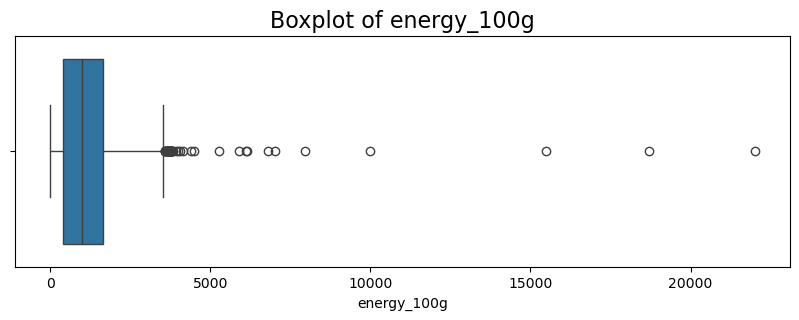

In [48]:
plt.figure(figsize=(10,3))
sns.boxplot(x=X['energy_100g'])
plt.title('Boxplot of energy_100g', fontsize=16)
plt.show()

On constate que la plupart des outliers de droite sur la boxplot sont des valeurs aberrantes. La boxplot est fortement concentr√©e √† gauche (asym√©trie √† droite), qui sera confirm√© dans l'histogramme ci-dessous.

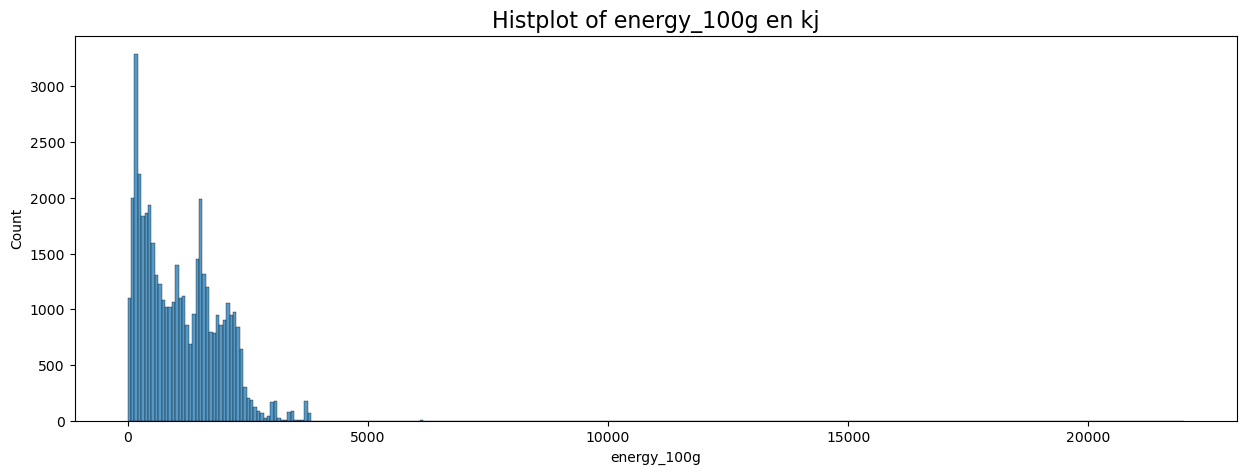

In [50]:
plt.figure(figsize=(15,5))
sns.histplot(data=X, x='energy_100g')
plt.title('Histplot of energy_100g en kj', fontsize=16)
plt.show()

La concentration (√©talement/asym√©trie √† droite) est confirm√©e dans cette visualisation. 

On constate la pr√©sence de 2 pics, signe d'une distribution unimodale. Le plus grand proche de 0 0k, et le 2√®me proche de 1400 kj. La pr√©sence de ces 2 pics est peut-√™tre li√©e √† des groupes sous-jacents. On peut regarder ce qui se passe si on utilise la variable 'nutrition_grade_fr'.

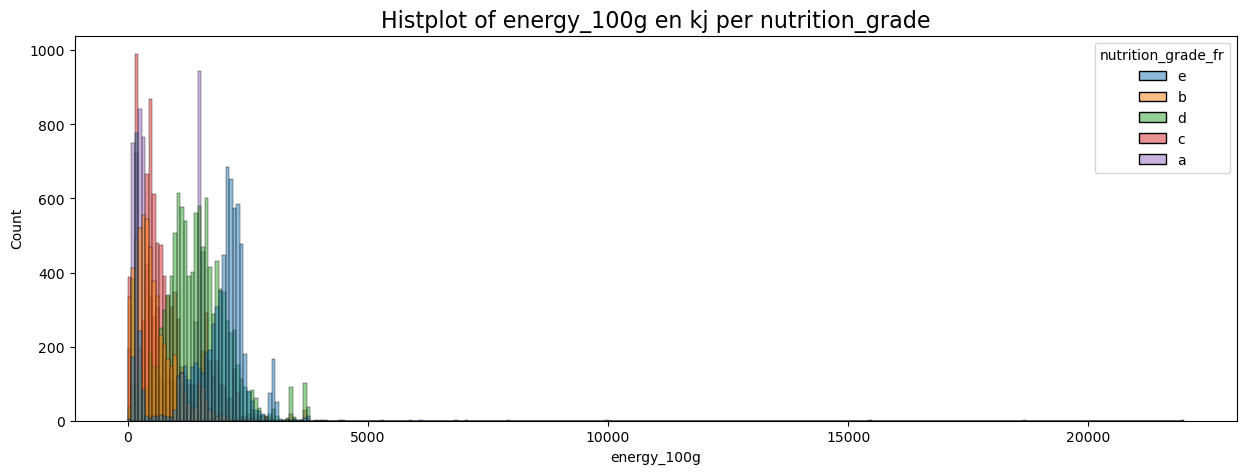

In [52]:
plt.figure(figsize=(15,5))
sns.histplot(data=X, x='energy_100g', hue='nutrition_grade_fr')
plt.title('Histplot of energy_100g en kj per nutrition_grade', fontsize=16)
plt.show()

**Calculer les limites IQR**

On peut aussi regarder la m√©thode bas√©e sur l'IQR. L'IQR est la diff√©rence entre le 25e centile (Q1) et le 75e centile (Q3) des donn√©es. Les valeurs :
- inf√©rieures √† Q1 - 1,5 * IQR
- ou sup√©rieures √† Q3 + 1,5 * IQR

sont consid√©r√©es comme aberrantes.

In [54]:
# On calcule l'IQR (intervalle interquartile)
Q1 = X['energy_100g'].quantile(0.25)
Q3 = X['energy_100g'].quantile(0.75)
IQR = Q3 - Q1

# On calcule les limites
limite_basse = max(0, Q1 - 1.5 * IQR)
limite_haute = Q3 + 1.5 * IQR

print("limite basse :", limite_basse, "kj")
print("limite haute :", limite_haute, "kj")

limite basse : 0 kj
limite haute : 3546.5 kj


In [55]:
mask = df['energy_100g'] > limite_haute
print(df.loc[mask, ['code', 'product_name', 'energy_100g']].sort_values(['energy_100g'], ascending=[False]))

                 code                                       product_name  \
176697  2000000045489                                             bubbly   
245311  3596710288755         mini choux go√ªt fromage de ch√®vre - poivre   
223318  3291960006127  Huiles vierge biologique de Colza - premi√®re p...   
178787       20233679                                 Halva with Almonds   
311783  8480017111852                       Chocolate negro sin az√∫cares   
...               ...                                                ...   
153710  0822078961003                              Huile de Noix de Coco   
264638  4260168150467                                Cocofin aus Kokos√∂l   
62542   0051500255483                                      Crisco Blends   
19654   0022506135635                                 Virgin coconut oil   
193954  3103220035559                                Les Schtroumpfs P!k   

        energy_100g  
176697      22000.0  
245311      18700.0  
223318      1548

Il y a 272 produits au del√† de la limite haute (3546 kj). Mais d'apr√®s le site, il existe de tr√®s nombreux produits alimentaires qui d√©passent cette limite haute, jusqu'√† 3 772 kj.

**Calculer le z-score**

Utilisez la m√©thode du z-score Le z-score mesure de combien d'√©carts types une valeur est √©loign√©e de la moyenne de la variable. On consid√®re qu'un z-score sup√©rieur √† 2 ou 3 correspond √† un outlier.

In [57]:
# On enl√®ve les NaN
sample = df[df['energy_100g'].notnull()].copy()

# Calculer le z-score
sample['z_energy'] = stats.zscore(sample['energy_100g'])
sample.head()

code                                                url  \
190666  3041090070198  http://world-fr.openfoodfacts.org/produit/3041...   
197596  3176571194008  http://world-fr.openfoodfacts.org/produit/3176...   
222863  3288110828401  http://world-fr.openfoodfacts.org/produit/3288...   
222856  3288110800018  http://world-fr.openfoodfacts.org/produit/3288...   
203907  3245412478864  http://world-fr.openfoodfacts.org/produit/3245...   

                           creator   created_t      created_datetime  \
190666                    loverock  1483100156  2016-12-30T12:15:56Z   
197596  openfoodfacts-contributors  1473964958  2016-09-15T18:42:38Z   
222863                     kiliweb  1485609054  2017-01-28T13:10:54Z   
222856                    loverock  1486745806  2017-02-10T16:56:46Z   
203907                  miles67off  1381155781  2013-10-07T14:23:01Z   

       last_modified_t last_modified_datetime  \
190666      1483101510   2016-12-30T12:38:30Z   
197596      1483894471   2017-01-08T16:54:31Z   
222863      1486746440   2017-02-10T17:07:20Z   
222856      1486746785   2017-02-10T17:13:05Z   
203907      1490273464   2017-03-23T12:51:04Z   

                                             product_name  \
190666                       Bl√©dilait croissance vanille   
197596                                  baby croissance 3   
222863                            Eveil croissance nature   
222856                Maxi format Eveil croissance nature   
203907  Milk-Shake substitut de repas, saveur chocolat...   

                                             generic_name  \
190666  Lait de suite et aliment lact√© liquide pour en...   
197596  Lait de suite pour nourrissons et aliment lact...   
222863  Lait de suite pour nourrissons √† partir de 10 ...   
222856  Lait de suite pour nourrissons √† partir de 10 ...   
203907  Boissons substitut de repas pour contr√¥le du p...   

                   quantity                 packaging  \
190666                500ml       bouteille,plastique   
197596                   1L       bouteille,plastique   
222863                   1l       bouteille,plastique   
222856                 8x1L  pack,plastique,bouteille   
203907  750 ml (3 x 250 ml)   Briquette,Carton,Paille   

                  packaging_tags                                     brands  \
190666       bouteille,plastique                   Bl√©dina,Bl√©dilait,Danone   
197596       bouteille,plastique                 candia,Candia Baby,Sodiaal   
222863       bouteille,plastique                               Lactel,Eveil   
222856  pack,plastique,bouteille                               Lactel,Eveil   
203907   briquette,carton,paille  Agir Carrefour nutrition,Groupe Carrefour   

                                      brands_tags  \
190666                   bledina,bledilait,danone   
197596                 candia,candia-baby,sodiaal   
222863                               lactel,eveil   
222856                               lactel,eveil   
203907  agir-carrefour-nutrition,groupe-carrefour   

                                               categories  \
190666  Laits pour b√©b√©,Laits de croissance,Laits arom...   
197596  Produits laitiers,Laits,Aliments pour b√©b√©,Lai...   
222863  Produits laitiers,Laits,Aliments pour b√©b√©,Lai...   
222856  Laits,Laits de croissance,Laits pour b√©b√©,D√®s ...   
203907  en:beverages,en:desserts,en:artificially-sweet...   

                                          categories_tags  \
190666  en:beverages,en:dairies,en:dairy-drinks,en:bab...   
197596  en:dairies,en:milks,en:baby-foods,en:baby-milk...   
222863  en:dairies,en:milks,en:baby-foods,en:baby-milk...   
222856  en:dairies,en:milks,en:baby-foods,en:baby-milk...   
203907  en:beverages,en:desserts,en:artificially-sweet...   

                                            categories_fr origins  \
190666  Boissons,Produits laitiers,Boissons lact√©es,Al...     NaN   
197596  Produits laitiers,Laits,Aliments pour b√©b√©,Lai...     NaN   
2

In [58]:
mask = sample['z_energy'] > 3
print(sample.loc[mask, ['product_name', 'energy_100g', 'z_energy']].sort_values(['energy_100g'], ascending=[False]))

                                             product_name  energy_100g  \
176697                                             bubbly      22000.0   
245311         mini choux go√ªt fromage de ch√®vre - poivre      18700.0   
223318  Huiles vierge biologique de Colza - premi√®re p...      15481.0   
178787                                 Halva with Almonds       9983.0   
311783                       Chocolate negro sin az√∫cares       7966.0   
...                                                   ...          ...   
62542                                       Crisco Blends       3590.0   
193954                                Les Schtroumpfs P!k       3573.0   
254692                                 Virgin Coconut Oil       3515.0   
306833                                  Saveur proven√ßale       3510.0   
217959                                Huile Vierge De Lin       3502.0   

         z_energy  
176697  26.079980  
245311  21.963404  
223318  17.947871  
178787  11.089405  
311783

Le calcul du z-score n'est pas non plus pertinent ici. Les produits entre 3 800 kj et 3 500 kj n'ont pas forc√©ment des valeurs aberrantes. On retrouve sensiblement le m√™me nombre de produits.

Je propose de m'appuyer sur le site internet, indiqu√© plus haut, et d√©terminer que les valeurs aberrantes se situent au-dessus de 4 000 kj.

**Remplacer les valeurs aberrantes par NaN**

In [61]:
# remplacer dans le dataset
mask = df['energy_100g'] > 4000
df.loc[mask, 'energy_100g'] = np.nan

# reg√©n√©rer la cible, les features
y, X = generate_target_and_features(df)

In [62]:
X.shape

(55448, 8)

In [63]:
mask = df['energy_100g'] > limite_haute
print(df.loc[mask, ['code', 'product_name', 'energy_100g']].sort_values(['energy_100g'], ascending=[False]))

                 code                           product_name  energy_100g
203685  3245390220660       Rillettes de sardine de Bretagne       4000.0
234726  3473710080032                      Palets pur beurre       3925.0
62532   0051500239131        Crisco All-Vegetable Shortening       3830.0
277355  5400910105201                          Huile de coco       3776.0
310564  8437005613157  Huile d'olive extra vierge biologique       3770.0
...               ...                                    ...          ...
153710  0822078961003                  Huile de Noix de Coco       3630.0
19654   0022506135635                     Virgin coconut oil       3590.0
62542   0051500255483                          Crisco Blends       3590.0
264638  4260168150467                    Cocofin aus Kokos√∂l       3590.0
193954  3103220035559                    Les Schtroumpfs P!k       3573.0

[257 rows x 3 columns]


On voit qu'il n'y a plus de valeur au-del√† de 4000 kj

**Traiter les autres types de valeur aberrante**

D'apr√®s ChatGPT : "il est tout √† fait possible d'avoir un produit alimentaire avec une valeur √©nerg√©tique (√©nergie) en kilojoules (kJ) sup√©rieure √† z√©ro et une teneur en prot√©ines de z√©ro gramme.
La raison en est que l'√©nergie d'un aliment provient de trois principaux macronutriments : 
- les glucides,
- les lipides (graisses)
- et les prot√©ines.

Donc si un aliment ne contient pas de prot√©ines, il peut quand m√™me contenir des glucides et/ou des lipides, qui contribuent √©galement √† son apport √©nerg√©tique.

Pour calculer l'√©nergie en kilojoules (kJ) d'un aliment, il faut conna√Ætre la quantit√© de chaque macronutriment (glucides, prot√©ines, lipides) et utiliser les coefficients √©nerg√©tiques correspondants :
- Glucides : 1 g de glucides = 17 kJ
- Prot√©ines : 1 g de prot√©ines = 17 kJ
- Lipides : 1 g de lipides = 37 kJ
"



In [67]:
# rechercher les produits dont l'energy_100g = 0, alors qu'il y a des prot√©ines, ou des lipides, ou des glucides
mask = (df['energy_100g'] == 0) & ((df['proteins_100g'] > 0) | (df['fat_100g'] > 0) | (df['carbohydrates_100g'] > 0))
print(df.loc[mask, ['code', 'product_name', 'energy_100g', 'proteins_100g', 'fat_100g', 'carbohydrates_100g']])

                 code                                       product_name  \
67499   0064420006271                                         Sour Cream   
23711   0028400040037                                             Fritos   
309318  8427603020532                               Tomates Tipo Canario   
118415  0613008721916                  Decaf-Zero Green Tea with Ginseng   
16019   0020601407893  Heinen's Organic Unsweetened With Lemon  Iced ...   
310147  8436038770103                           Pulpa de mango congelada   
245997  3596710355389                                   Planet Cola Z√©ro   
242507  3564700629222  D√©liDelo sans sucres √† l'eau de source au pamp...   
310145  8436038770066                       Pulpa de guan√°bana congelada   
262451  4060800134042                                     V Water Shield   
195994  3163937310004                                     Sensation Anis   
66803   0059749887649                                Peas assorted sizes   
230216  

Le traitement de ces cas l√† ne peut pas √™tre identique, car il y a tr√®s certainement un arrondi √† z√©ro de l'energy_100g qui est r√©alis√©. Par exemple pour le dernier produit de liste, prot√©ines = 0,1, entra√Æne une energy = 0 par arrondi.

Par contre pour les 2 premiers produits (Sour cream, et fritos), il est clair que l'energy ne peut pas √™tre = 0.

Voici la liste des codes produits ci-dessus dont la valeur 0 pour l'energy peut √™tre consid√©r√©e comme aberrante :
- 0064420006271
- 0028400040037
- 8427603020532
- 8436038770103
- 8436038770066
- 0059749887649
- 01275900
- 0894773001155
- 0894773001896



Remplacer la valeur d'√©nergie par la valeur calcul√©e avec la formule : energy = 17 *proteins + 37 * fat + 17 * carbohydrates

In [70]:
mask = df['code'].isin(["0064420006271","0028400040037","8427603020532","8436038770103","8436038770066","0059749887649","01275900","0894773001155","0894773001896"])
df.loc[mask, 'energy_100g']

67499     0.0
23711     0.0
309318    0.0
310147    0.0
310145    0.0
66803     0.0
172837    0.0
111493    0.0
172853    0.0
Name: energy_100g, dtype: float64

In [71]:
df.loc[mask, 'energy_100g'] = 17 * df['proteins_100g'] + 17 * df['carbohydrates_100g'] + 37 * df['fat_100g'] 

In [72]:
df.loc[mask, 'energy_100g']

67499     725.00
23711     676.00
309318     95.80
310147    289.00
310145    255.00
66803     259.60
172837     19.21
111493     94.52
172853     19.21
Name: energy_100g, dtype: float64

Rechercher les produits dont l'energy_100g > 0, alors qu'il n'y a aucune prot√©ine, lipide, et glucide

In [74]:
# rechercher les produits dont l'energy_100g > 0, alors qu'il n'y a aucunes prot√©ines, lipides, et glucides
mask = (df['energy_100g'] > 0) & ((df['proteins_100g'] == 0) & (df['fat_100g'] == 0) & (df['carbohydrates_100g'] == 0))
print(df.loc[mask, ['code', 'product_name', 'energy_100g', 'proteins_100g', 'fat_100g', 'carbohydrates_100g', 'sugars_100g']])

                 code                                       product_name  \
280341  5449000050229                                 Coca-cola light 2L   
280356  5449000056665         Coca-Cola Light - sans caf√©ine, sans sucre   
280473  5449000169358                   Coca Cola Z√©ro sans caf√©ine 1.5L   
318340       90376863                   red bull zero calories - redbull   
210024  3256221107982                P√©tillante, saveur citon-citon vert   
269201  5000112558265                                     Coca-Cola Z√©ro   
251876  3760036481774            Muscovado pur sucre de canne non rafin√©   
198272  3179732368942                        Perrier citron vert, limoen   
238917  3560070592975                                      Saveur Cassis   
192056  3068320055008                                              Evian   
203893  3245412438523                         Iced Tea Z√©ro saveur P√™che   
280490  5449000195364                              Coca-Cola Zero Cherry   
2804

Tout ces produits sont des boissons, plut√¥t de type light, ce qui explique les valeurs nulles des prot√©ines, des lipides, et des glucides.

En regardant sur internet pour le Coca cola light par exemple, l'energy devrait √™tre de 1 kj.

Il y a quand m√™me 3 produits qui questionnent car leurs valeurs sont tr√®s √©lev√©es: 
- 3760036481774 (Muscovado pur sucre de canne non rafin√©) -> 1611 kj . Ce produit devrait avoir 100g de carbohydrate (et de sucres) d'apr√®s internet
- 192056 (Evian) -> 2787 kj . Ce produit devrait avoir un energy = 0 kj
- 93613910 (Extra - Peppermint) -> 915 kj . Ce produit devrait avoir 62g de carbohydrates (et de sucres) d'apr√®s internet

On pourra traiter ces 3 produits uniquement, en mettant la bonne valeur pour les carbohydrates et le sucre.

Les autres valeurs sont certainement li√©es √† des probl√®mes d'arrondi de valeur √† l'unit√© en dessous 0.

Remplacer les carbohydrates des 2 produits suivants:

In [77]:
mask = df['code'].isin(["3760036481774", "93613910"])
df.loc[mask, 'carbohydrates_100g'] = 100
df.loc[mask, 'sugars_100g'] = 100
mask = df['code'].isin(["93613910"])
df.loc[mask, 'carbohydrates_100g'] = 62
df.loc[mask, 'sugars_100g'] = 62

Mettre l'energie √† 0 du produit suivant : 

In [79]:
mask = df['code'].isin(["3068320055008"])
df.loc[mask, 'energy_100g'] = 0

**Reg√©n√©rer la cible, les features**

In [81]:
# reg√©n√©rer la cible, les features
y, X = generate_target_and_features(df)

df.shape

(55448, 162)

In [82]:
X.shape

(55448, 8)

In [83]:
y.shape

(55448,)

**Visualiser la distribution de la variable apr√®s traitement des valeurs aberrantes**

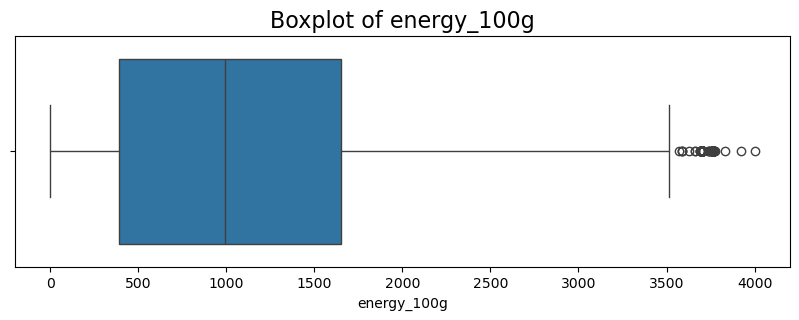

In [85]:
plt.figure(figsize=(10,3))
sns.boxplot(x=X['energy_100g'])
plt.title('Boxplot of energy_100g', fontsize=16)
plt.show()

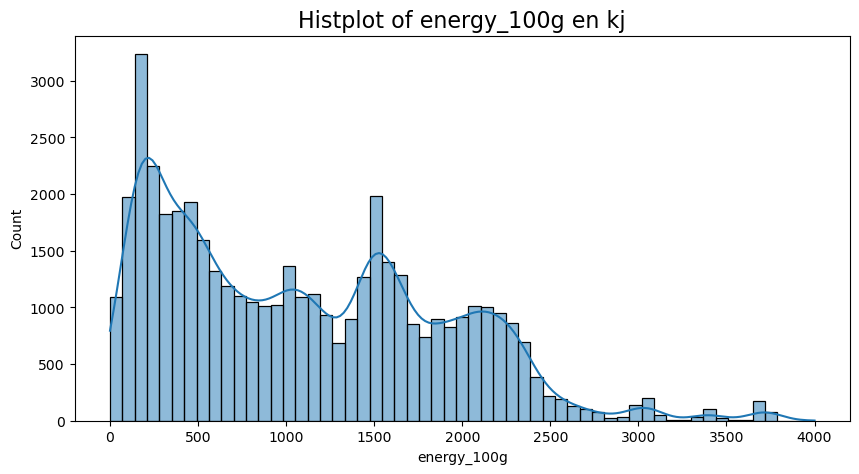

In [86]:
plt.figure(figsize=(10,5))
sns.histplot(data=X, x='energy_100g', kde=True)
plt.title('Histplot of energy_100g en kj', fontsize=16)
plt.show()

La courbe de distribution s'ajuste correctement √† l'histogramme.

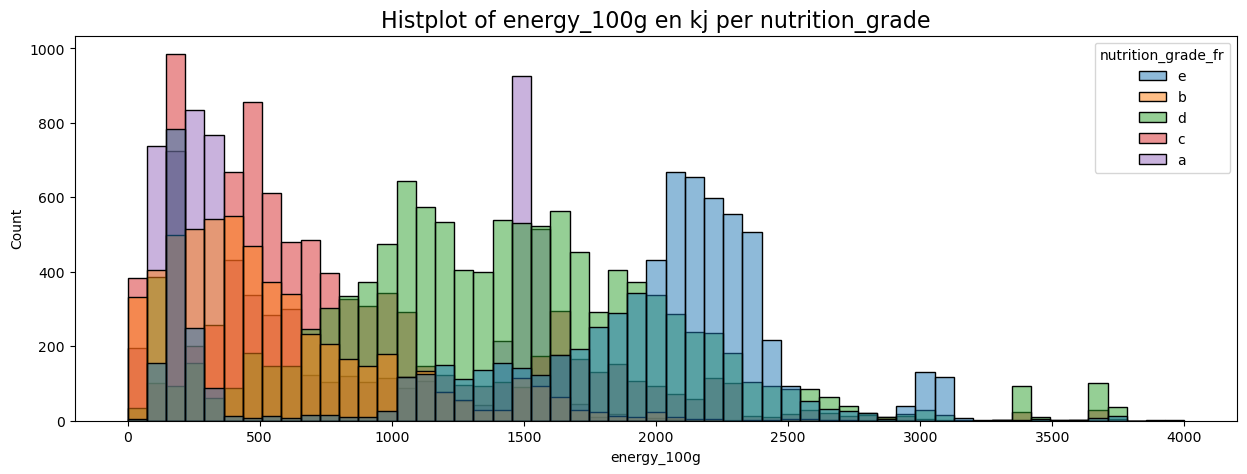

In [88]:
plt.figure(figsize=(15,5))
sns.histplot(data=X, x='energy_100g', hue='nutrition_grade_fr')
plt.title('Histplot of energy_100g en kj per nutrition_grade', fontsize=16)
plt.show()

In [89]:
X.describe()

energy_100g  proteins_100g      fat_100g  carbohydrates_100g  \
count  45217.000000   44856.000000  43600.000000        43252.000000   
mean    1090.835556       7.521530     13.334425           27.883429   
std      783.840352       7.211233     17.001147           27.327219   
min        0.000000       0.000000      0.000000            0.000000   
25%      389.000000       1.700000      1.200000            4.400000   
50%      994.000000       6.000000      6.600000           14.500000   
75%     1651.000000      10.600000     21.600000           53.300000   
max     4000.000000      86.000000    380.000000          190.000000   

          salt_100g   sugars_100g  saturated-fat_100g  
count  42834.000000  42697.000000        42539.000000  
mean       0.880374     13.240657            5.478628  
std        2.811570     18.517551            8.402184  
min        0.000000     -0.100000            0.000000  
25%        0.070000      1.100000            0.300000  
50%        0.500000      4.300000            2.000000  
75%        1.200000     17.000000            7.700000  
max      297.600000    100.000000          210.000000

### 2.3 - Feature "proteins_100g"

Une valeur 0 pour les prot√©ines est aberrante seulement si l'energie est diff√©rente de 0, et les fat / carborhydrates sont = 0. Mais ce cas vient d'√™tre trait√© plus haut.

La valeur max 80 n'est pas aberrante √† premi√®re vue. D'apr√®s le site internet informationsnutritionnelles.fr (lien : https://informationsnutritionnelles.fr/proteines ), les prot√©ines peuvent monter jusqu'√† 87.6g pour un aliment de 100g. Donc rien d'aberrant. Sauf qu'en g√©n√©ral il s'agit de produits compl√©mentaires hyper prot√©in√©s, ou de pr√©paration de cuisine.

**Visualiser la distribution de la variable**

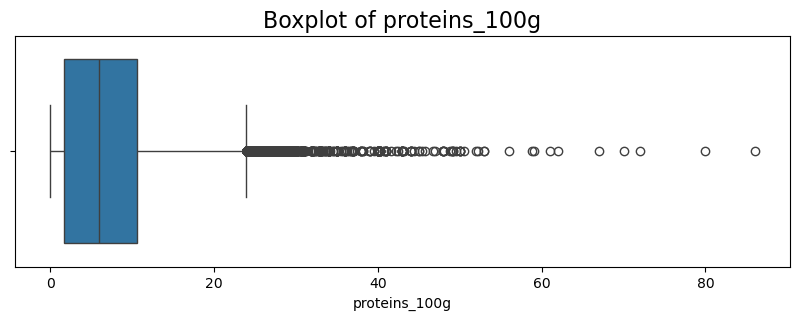

In [93]:
plt.figure(figsize=(10,3))
sns.boxplot(x=X['proteins_100g'])
plt.title('Boxplot of proteins_100g', fontsize=16)
plt.show()

On constate la pr√©sence de nombreux outliers, une forte concentration √† gauche.

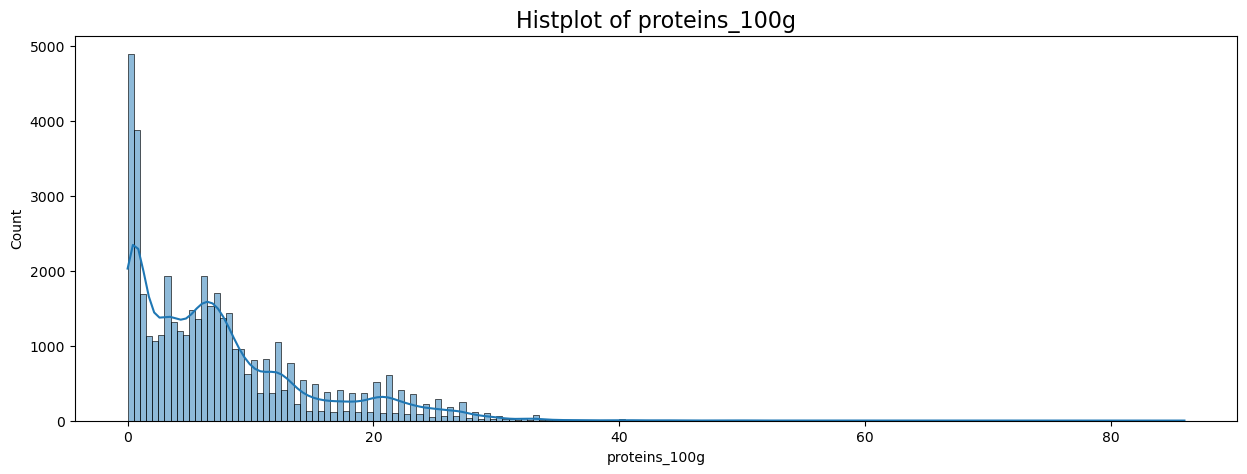

In [95]:
plt.figure(figsize=(15,5))
sns.histplot(data=X, x='proteins_100g', kde=True)
plt.title('Histplot of proteins_100g', fontsize=16)
plt.show()

On constate une distribution assez similaire √† celle de l'energy_100g. Pr√©sence de 2 pics : un plus gros, 0-0.5, et un plus petit aux alentours de 6. 

Asym√©trie √† droite (√©talement √† droite). La loi de distribution s'ajuste correctement.

**Calculer les limites IQR**

In [98]:
# On calcule l'IQR (intervalle interquartile)
Q1 = X['proteins_100g'].quantile(0.25)
Q3 = X['proteins_100g'].quantile(0.75)
IQR = Q3 - Q1

# On calcule les limites
limite_basse = max(0, Q1 - 1.5 * IQR)
limite_haute = Q3 + 1.5 * IQR

print("limite basse :", limite_basse, "kj")
print("limite haute :", limite_haute, "kj")

limite basse : 0 kj
limite haute : 23.950000000000003 kj


Combien de produits concern√©s, et lesquels, sont au-dessus de la limite haute ?

In [100]:
mask = df['proteins_100g'] > limite_haute
print(df.loc[mask, ['code', 'product_name', 'proteins_100g']].sort_values(['proteins_100g'], ascending=[False]))

                 code                       product_name  proteins_100g
193318  3092718618971                       Sirop Fraise           86.0
264863  4260402480985       Seitan-Basis rein pflanzlich           80.0
242107  3564700511930           Chewing-gum menthe verte           72.0
281699  5707312003129        Pronto¬Æ OGGI Melon Cocktail           70.0
281697  5707312003105            Pronto¬Æ OGGI Peppermint           67.0
...               ...                                ...            ...
201761  3222476450562  Saveurs d'Ailleurs Queso Manchego           24.0
216791  3263859462215  Jambon Cru Fum√© de la For√™t Noire           24.0
263128  4104060028052                          Biol√§nder           24.0
261063  4021500086949         Gr√ºnl√§nder Chili & Paprika           24.0
266852  4600935010486                   –ß–µ—á–µ–≤–∏—Ü–∞ –∫—Ä–∞—Å–Ω–∞—è           24.0

[1769 rows x 3 columns]


On constate des valeurs aberrantes, notamment pour le chewing-gum menthe verte, 72g de prot√©ines, or d'apr√®s internet c'est 0g de prot√©ines.

Le seitan pourrait monter √† 75g sur internet.

Le poulet √† 27g.

C'est difficile de se faire une id√©e g√©n√©rale. Voyons avec un diagramme de distribution, filtr√© sur les produits au-dessus de la limite haute :

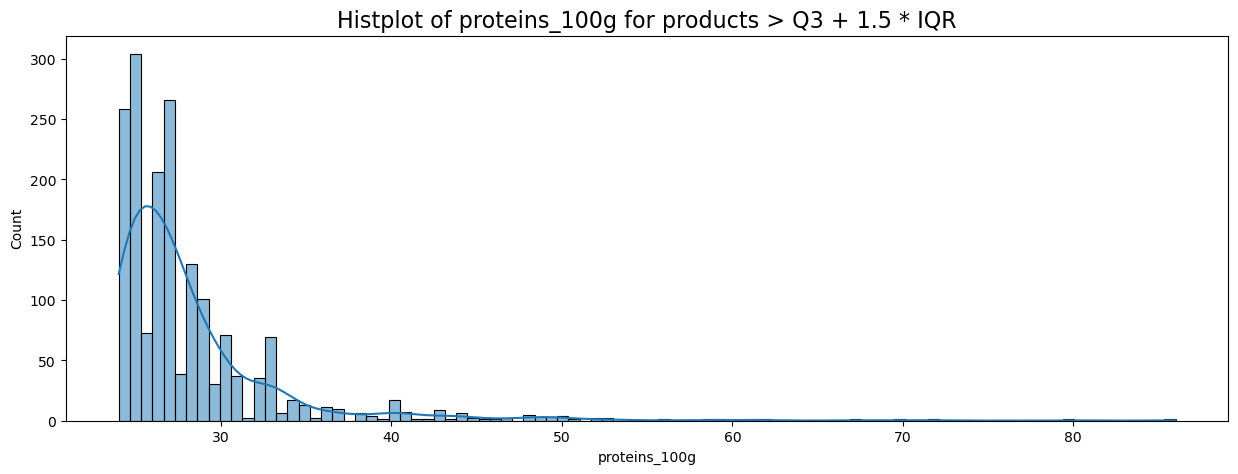

In [102]:
plt.figure(figsize=(15,5))
sns.histplot(data=X[mask], x='proteins_100g', kde=True)
plt.title('Histplot of proteins_100g for products > Q3 + 1.5 * IQR', fontsize=16)
plt.show()

On constate une forte diminution du nombre de produits au-del√† de 50g de prot√©ines

In [104]:
mask = df['proteins_100g'] > 50
print("Liste des produits de plus de 50g de prot√©ines :", df.loc[mask, ['code', 'product_name', 'proteins_100g']].sort_values(['proteins_100g'], ascending=[False]))

Liste des produits de plus de 50g de prot√©ines :                  code                                       product_name  \
193318  3092718618971                                       Sirop Fraise   
264863  4260402480985                       Seitan-Basis rein pflanzlich   
242107  3564700511930                           Chewing-gum menthe verte   
281699  5707312003129                        Pronto¬Æ OGGI Melon Cocktail   
281697  5707312003105                            Pronto¬Æ OGGI Peppermint   
313012  8692809031006                                           Mir Coco   
250619  3700531201538                                Sucette au chocolat   
282768  5999563456568                                  Bio Chlorella Por   
255538  3770004620081      Les Insectes Ap√©ritifs Saveur M√©diterran√©enne   
308823  8422584017069  Milanesas de soja texturizada &quot;El Granero...   
312616  8594055300151                                            Chicken   
176569  2000000041639        Bulk

La valeur pour le sirop de fraise, sucette au chocolat, et les chewing-gum sont aberrantes

**Calculer le z-score**

In [107]:
# On enl√®ve les NaN
sample = df[df['proteins_100g'].notnull()].copy()

# Calculer le z-score
sample['z_proteins'] = stats.zscore(sample['proteins_100g'])
sample.head()

mask = sample['z_proteins'] > 3
print(sample.loc[mask, ['product_name', 'proteins_100g', 'z_proteins']].sort_values(['proteins_100g'], ascending=[False]))

                                     product_name  proteins_100g  z_proteins
193318                               Sirop Fraise           86.0   10.882930
264863               Seitan-Basis rein pflanzlich           80.0   10.050886
242107                   Chewing-gum menthe verte           72.0    8.941493
281699                Pronto¬Æ OGGI Melon Cocktail           70.0    8.664145
281697                    Pronto¬Æ OGGI Peppermint           67.0    8.248123
...                                           ...            ...         ...
206760                             Arachide coque           29.4    3.033977
207055                             Mon Jambon Sec           29.4    3.033977
310371         Fouet Extra &quot;Le Catalan&quot;           29.3    3.020109
209109  Saucisson sec pur porc sup√©rieur Pyr√©n√©es           29.3    3.020109
207054                      Jambon cru fum√© Speck           29.2    3.006242

[393 rows x 3 columns]


Un z-score de 3 correspondrait √† 29.2g de prot√©ines.

On voit qu'au dessus du z-score de 3, ou au-dessus de la limite calcul√©e avec l'IQR, il y a de nombreux produits pour lesquels la valeur n'est pas aberrante. Pour identifier les valeurs aberrantes, il faudrait v√©rifier les valeurs de chaque produit au dessus du z-score, et voir s'il est ab√©rrante ou non. Compte tenu du contexte de l'analyse, il serait sage de laisser ces valeurs inchang√©es qui semblent correctes √† premi√®re vue. 

Je vais juste corriger le produit Chewing-gum menthe verte, le sirop de fraise, et sucette au chocolat, qui ont des valeurs aberrantes √©videntes, et pour lesquelles je mettrai la valeur trouv√©e sur internet :

In [110]:
# remplacer dans le dataset
mask = df['code'] == '3564700511930'
df.loc[mask, ['proteins_100g']] = 0

mask = df['code'] == '3092718618971'
df.loc[mask, ['proteins_100g']] = 0

mask = df['code'] == '3700531201538'
df.loc[mask, ['proteins_100g']] = 6.4

# reg√©n√©rer la cible, les features
y, X = generate_target_and_features(df)
X.shape

(55448, 8)

### 2.3 - Features "fat_100g" et "saturated-fat_100g"

In [112]:
X.describe()

energy_100g  proteins_100g      fat_100g  carbohydrates_100g  \
count  45217.000000   44856.000000  43600.000000        43252.000000   
mean    1090.835556       7.516790     13.334425           27.883429   
std      783.840352       7.191012     17.001147           27.327219   
min        0.000000       0.000000      0.000000            0.000000   
25%      389.000000       1.700000      1.200000            4.400000   
50%      994.000000       6.000000      6.600000           14.500000   
75%     1651.000000      10.600000     21.600000           53.300000   
max     4000.000000      80.000000    380.000000          190.000000   

          salt_100g   sugars_100g  saturated-fat_100g  
count  42834.000000  42697.000000        42539.000000  
mean       0.880374     13.240657            5.478628  
std        2.811570     18.517551            8.402184  
min        0.000000     -0.100000            0.000000  
25%        0.070000      1.100000            0.300000  
50%        0.500000      4.300000            2.000000  
75%        1.200000     17.000000            7.700000  
max      297.600000    100.000000          210.000000

**Remplacer les valeurs aberrantes au-dessus de 100g par NaN**

Rechercher les produits concern√©s:

In [115]:
mask = (df['fat_100g'] > 100) | (df['saturated-fat_100g'] > 100)
print(df.loc[mask, ['code', 'product_name', 'fat_100g', 'saturated-fat_100g']].sort_values(['fat_100g'], ascending=[False]))

                 code                                product_name  fat_100g  \
245311  3596710288755  mini choux go√ªt fromage de ch√®vre - poivre     380.0   
305054  8032942610032                    Graine de couscous moyen     105.0   
303101  8005305900255                    Ekstra Jomfru Olivenolie     101.0   

        saturated-fat_100g  
245311               210.0  
305054                 0.3  
303101                15.0  


Remplacer les valeurs par NaN

In [117]:
# remplacer dans le dataset
mask = df['code'] == '3596710288755'
df.loc[mask, ['fat_100g', 'saturated-fat_100g']] = np.nan

mask = df['code'].isin(['8032942610032', '8005305900255'])
df.loc[mask, 'fat_100g'] = np.nan

# reg√©n√©rer la cible, les features
y, X = generate_target_and_features(df)
X.shape

(55448, 8)

In [118]:
X.describe()

energy_100g  proteins_100g      fat_100g  carbohydrates_100g  \
count  45217.000000   44856.000000  43597.000000        43252.000000   
mean    1090.835556       7.516790     13.321901           27.883429   
std      783.840352       7.191012     16.899877           27.327219   
min        0.000000       0.000000      0.000000            0.000000   
25%      389.000000       1.700000      1.200000            4.400000   
50%      994.000000       6.000000      6.600000           14.500000   
75%     1651.000000      10.600000     21.600000           53.300000   
max     4000.000000      80.000000    100.000000          190.000000   

          salt_100g   sugars_100g  saturated-fat_100g  
count  42834.000000  42697.000000        42538.000000  
mean       0.880374     13.240657            5.473820  
std        2.811570     18.517551            8.343559  
min        0.000000     -0.100000            0.000000  
25%        0.070000      1.100000            0.300000  
50%        0.500000      4.300000            2.000000  
75%        1.200000     17.000000            7.700000  
max      297.600000    100.000000          100.000000

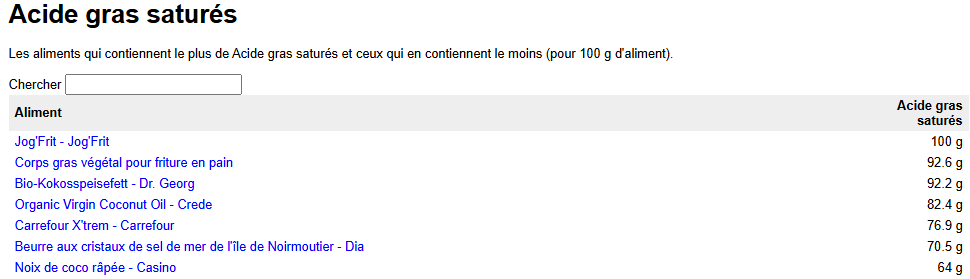

Les acides gras satur√©s peuvent potentiellement monter jusqu'√† 100g. Mais on ne trouve que 4 produits sur internet au-dessus de 80g. D'apr√®s chatGPT, au-dessus de 90 est une valeur aberrante, car c'est la valeur max pour 100g d'huile de palme ou d'huile de coco.

On peut donc raisonablement remplacer les valeurs de saturated-fat_100g quand elle d√©passe 90g:

**Remplacer les valeurs aberrantes de saturated-fat_100g au-dessus de 90g par NaN**

Rechercher les produits concern√©s : 

In [123]:
mask = df['saturated-fat_100g'] > 90
print(df.loc[mask, ['code', 'product_name', 'saturated-fat_100g', 'fat_100g']].sort_values(['fat_100g'], ascending=[False]))

                 code                                  product_name  \
203402  3245270001044              Huile vierge de Noix de Coco bio   
223363  3291960013040  Huile de noix de coco biologique go√ªt neutre   
115370  0411015621416                            extra virgin cocos   
275205  5158418187631                  V√©g√©taline (offre familiale)   
315570  8718182611298                                     Kokosolie   
177219       20022082                             Frites & Fritures   
264638  4260168150467                           Cocofin aus Kokos√∂l   
261373       40264479                                     Kokosfett   
184439       26008028                                      Jog'Frit   
265119  4305615443041                                 Kokos√∂l nativ   
280238  5425600102483                       Huile de coco - Bee&Cee   
258204  4006040216278                          Huile vierge de Coco   
223303  3291960001542                  Huile vierge de noix de coco   
3

Remplacer les valeurs des produits trouv√©s par NaN :

In [125]:
mask = df['saturated-fat_100g'] > 90
df.loc[mask, 'saturated-fat_100g'] = np.nan

# reg√©n√©rer la cible, les features
y, X = generate_target_and_features(df)
X.shape

(55448, 8)

**Traiter les valeurs aberrantes des cas o√π saturated-fat_100g > fat_100g**

La valeur de la variable fat_100g pourrait √™tre aberrante si la valeur de la variable saturated-fat_100g > fat_100g.

In [128]:
mask = df['saturated-fat_100g'] > df['fat_100g']
print(df.loc[mask, ['code', 'product_name', 'fat_100g', 'saturated-fat_100g']].sort_values(['fat_100g'], ascending=[False]))

                 code                                       product_name  \
177333       20031244                                   Macarons de coco   
252224  3760056264630               Mozzarella Sp√©cial Cuisine (23 % MG)   
253699  3760122966109      Le vrai cookie avec gros morceaux de chocolat   
206159  3250391072781                                         L√©ger Doux   
220630  3272770088770                             Le coffret du Fromager   
230843  3396411221309                             Chocolat Noir Mendiant   
266550  4388844182677                                  Butter Croissants   
298783  7622210497383                                         Dairy milk   
205751  3250390600671                                 Adelie Bac Vanille   
224179  3302741597021     Les St Jacques au Noilly & Riz Basmati cuisin√©   
274767  5060224881163                                      Cheese salad    
232989  3438860006646                                         Choconeige   
205678  3

Globalement l'√©cart entre les 2 variables est tr√®s faible, hormis les produits suivants donc l'√©cart questionnent :
- 3760075290108 (vu sur internet, fat_100g devrait √™tre √©gal √† 22)
- 3250390491064 (vu sur internet, 0.6g pour saturated-fat)
- 3261055931542 (vu sur internet, 1.9g pour saturated-fat)
- 3250390600671 (vu sur internet 6,6g fat, 4g saturated-fat)

Pour les autres cas, je propose de mettre la valeur NaN  pour saturated-fat_100g.

Mettre les bonnes valeurs :

In [130]:
mask = df['code'] == '3760075290108'
df.loc[mask, 'fat_100g'] = 22

mask = df['code'] == '3250390491064'
df.loc[mask, 'saturated-fat_100g'] = 0.6

mask = df['code'] == '3261055931542'
df.loc[mask, 'saturated-fat_100g'] = 1.9

mask = df['code'] == '3250390600671 '
df.loc[mask, 'saturated-fat_100g'] = 4
df.loc[mask, 'fat_100g'] = 6.6

In [131]:
mask = df['saturated-fat_100g'] > df['fat_100g']
df.loc[mask, 'saturated-fat_100g'] = np.nan

In [132]:
# reg√©n√©rer la cible, les features
y, X = generate_target_and_features(df)
X.shape

(55448, 8)

**Visualiser la distribution de la variable fat_100g**

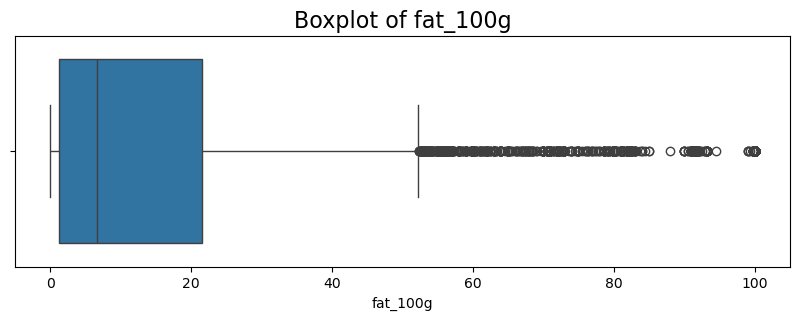

In [134]:
plt.figure(figsize=(10,3))
sns.boxplot(x=X['fat_100g'])
plt.title('Boxplot of fat_100g', fontsize=16)
plt.show()

Pr√©sence d'outliers, mais au vu de l'analyse pr√©c√©dentes des valeurs aux limites, ces outliers ne semblent pas des valeurs aberrantes.

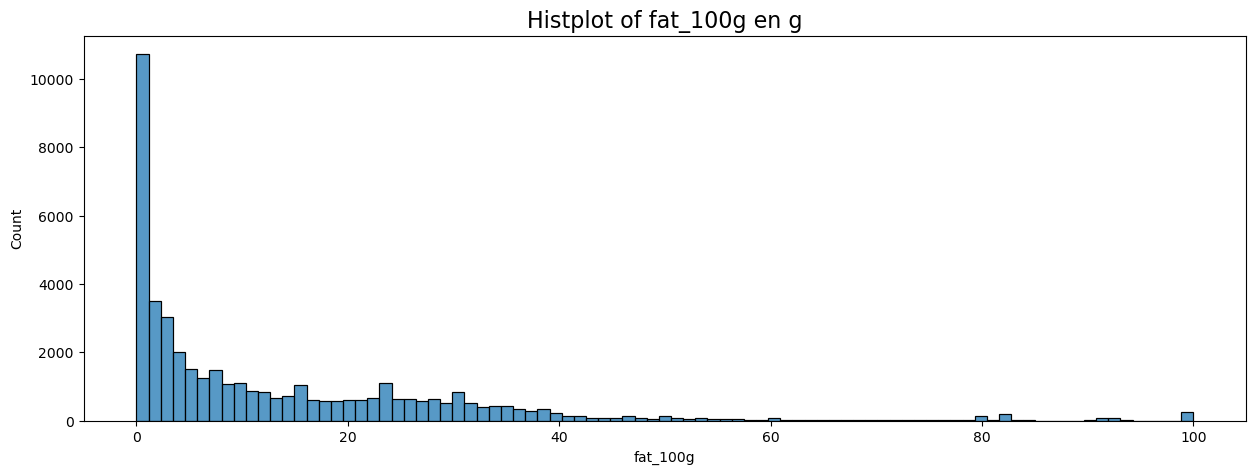

In [136]:
plt.figure(figsize=(15,5))
sns.histplot(data=X, x='fat_100g')
plt.title('Histplot of fat_100g en g', fontsize=16)
plt.show()

Distribution asym√©trique droite (concentration √† gauche - √©talement √† droite), unimodale. 

Le calcul de l'IQR ou du z-score ne semble par pertinent ici pour identifier les valeurs aberrantes, car elles semblent toutes coh√©rentes.

**Visualiser la distribution de la variable saturated-fat_100g**

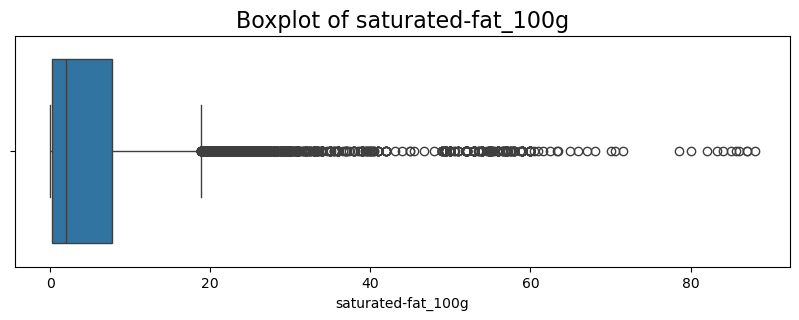

In [139]:
plt.figure(figsize=(10,3))
sns.boxplot(x=X['saturated-fat_100g'])
plt.title('Boxplot of saturated-fat_100g', fontsize=16)
plt.show()

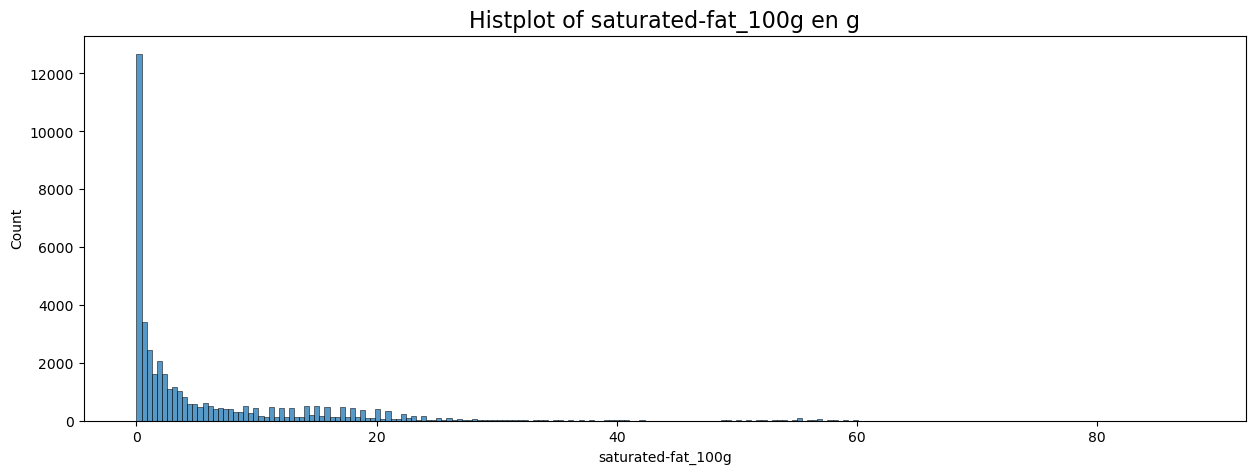

In [140]:
plt.figure(figsize=(15,5))
sns.histplot(data=X, x='saturated-fat_100g')
plt.title('Histplot of saturated-fat_100g en g', fontsize=16)
plt.show()

### 2.4 - Features "carbohydrates_100g" et "sugars_100g"

In [143]:
X.describe()

energy_100g  proteins_100g      fat_100g  carbohydrates_100g  \
count  45217.000000   44856.000000  43597.000000        43252.000000   
mean    1090.835556       7.516790     13.322405           27.883429   
std      783.840352       7.191012     16.899808           27.327219   
min        0.000000       0.000000      0.000000            0.000000   
25%      389.000000       1.700000      1.200000            4.400000   
50%      994.000000       6.000000      6.600000           14.500000   
75%     1651.000000      10.600000     21.600000           53.300000   
max     4000.000000      80.000000    100.000000          190.000000   

          salt_100g   sugars_100g  saturated-fat_100g  
count  42834.000000  42697.000000        42462.000000  
mean       0.880374     13.240657            5.435640  
std        2.811570     18.517551            8.134255  
min        0.000000     -0.100000            0.000000  
25%        0.070000      1.100000            0.300000  
50%        0.500000      4.300000            2.000000  
75%        1.200000     17.000000            7.700000  
max      297.600000    100.000000           88.000000

**Remplacer par NaN les valeurs n√©gatives de sugars_100g :**

In [145]:
mask = df['sugars_100g'] < 0
print(df.loc[mask, 'sugars_100g'])
df.loc[mask, 'sugars_100g'] = np.nan

195761   -0.1
Name: sugars_100g, dtype: float64


In [146]:
print(df.loc[mask, 'sugars_100g'])

195761   NaN
Name: sugars_100g, dtype: float64


**Remplacer par NaN les valeurs > 100g de carbohydrates_100g:**

In [148]:
mask = df['carbohydrates_100g'] > 100
print(df.loc[mask, 'carbohydrates_100g'])
df.loc[mask, 'carbohydrates_100g'] = np.nan

234726    106.0
245311    190.0
317635    139.0
Name: carbohydrates_100g, dtype: float64


In [149]:
print(df.loc[mask, 'carbohydrates_100g'])

234726   NaN
245311   NaN
317635   NaN
Name: carbohydrates_100g, dtype: float64


**Reg√©ner la cible, le dataset, les features**

In [151]:
# reg√©n√©rer la cible, les features
y, X = generate_target_and_features(df)
X.shape

(55448, 8)

**Identifier les produits dont sugars_100g > carbohydrates_100g**

In [153]:
mask = df['carbohydrates_100g'] < df['sugars_100g']
print(df.loc[mask, ['code', 'product_name', 'carbohydrates_100g', 'sugars_100g']])

                 code                                       product_name  \
209122  3254568649813        Darnes de saumon label rouge d'√âcosse farci   
18955   0021357020138  Hickory Farms¬Æ Our Signature Beef Summer Sausa...   
190361  3038680053044                                  Eminc√©s de Saumon   
215452  3263851394118                                           Girolles   
217257  3263859848811                         Saut√© de l√©gumes au poulet   
67359   0063351049005                                R√¥ti de b≈ìuf au jus   
222045  3278690085646                         Empr√©sur√© Chocolat intense   
280086  5425008346618                                 Noisette p√©tillant   
181062       20681593   Saut√© de Kangourou marin√© au vin rouge et √©pices   
66912   0060383998622                      Milk chocolate with hazelnuts   
202818  3230890758386                    L'Extra de Poulet Grill√© Nature   
212665  3257981665248         10 ≈ìufs de poules √©lev√©es en plein air Bi

Il y a beaucoup de produits concern√©s, trop pour des corrections manuelles. En plus il est difficile de savoir lequel des 2 est bon ou faux. On va donc mettre NaN pour les 2 variables.

**Remplacer les valeurs de carbohydrates_100g et sugars_100g, par NaN, quand sugars_100g > carbohydrates_100g**

In [156]:
mask = df['carbohydrates_100g'] < df['sugars_100g']
df.loc[mask, ['carbohydrates_100g', 'sugars_100g']] = np.nan

**Reg√©n√©rer la cible, les features**

In [158]:
# reg√©n√©rer la cible, les features
y, X = generate_target_and_features(df)
X.shape

(55448, 8)

**Visualiser la distribution de la variable**

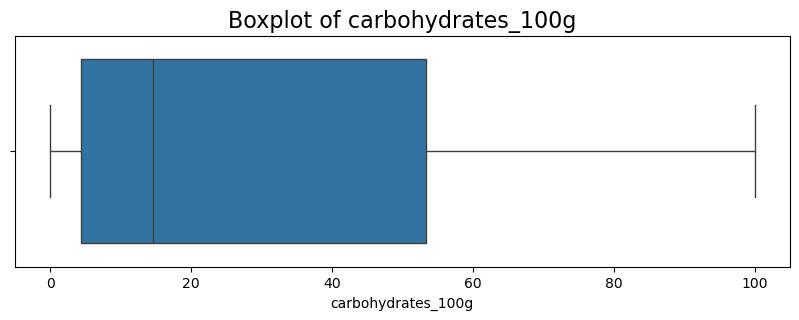

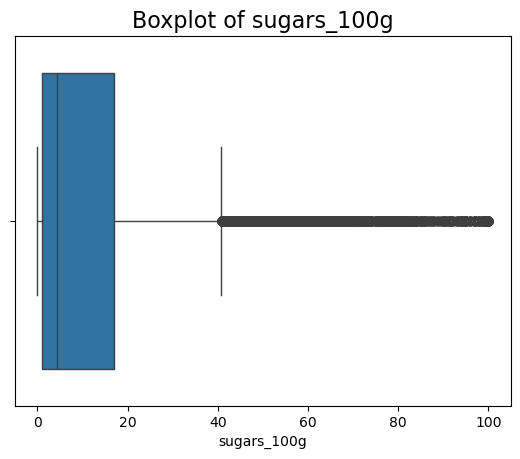

In [160]:
plt.figure(figsize=(10,3))
sns.boxplot(x=X['carbohydrates_100g'])
plt.title('Boxplot of carbohydrates_100g', fontsize=16)
plt.show()

sns.boxplot(x=X['sugars_100g'])
plt.title('Boxplot of sugars_100g', fontsize=16)
plt.show()

Beaucoup d'ouliers, mais ils ne semblent pas √™tre aberrants.

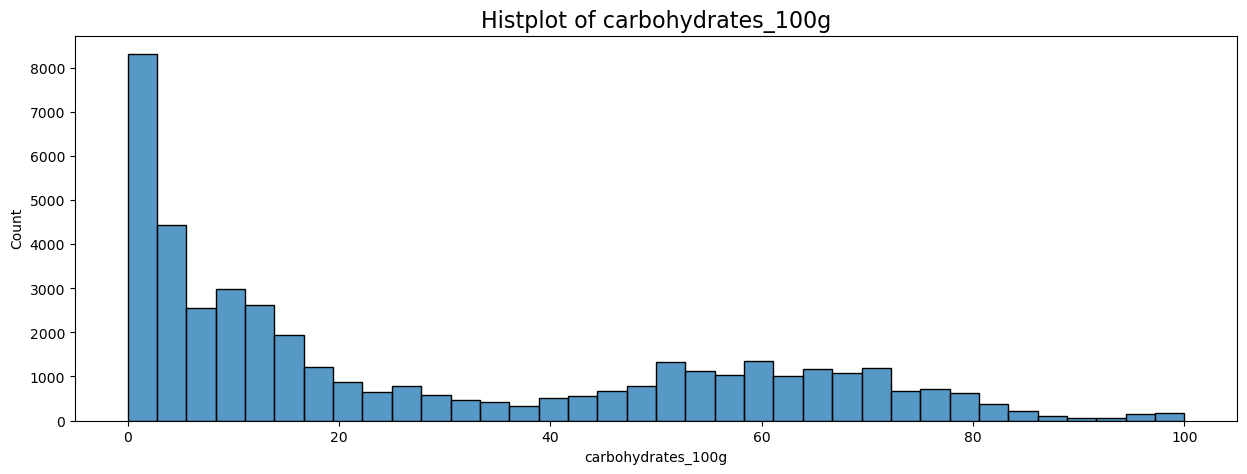

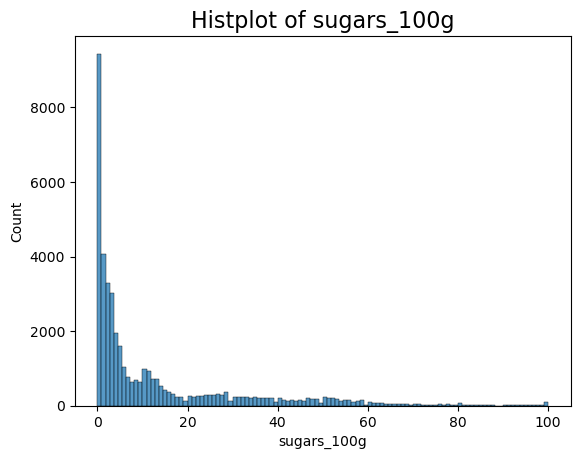

In [162]:
plt.figure(figsize=(15,5))
sns.histplot(data=X, x='carbohydrates_100g')
plt.title('Histplot of carbohydrates_100g', fontsize=16)
plt.show()

sns.histplot(data=X, x='sugars_100g')
plt.title('Histplot of sugars_100g', fontsize=16)
plt.show()

### 2.5 - Features "salt_100g"

In [164]:
X.describe()

energy_100g  proteins_100g      fat_100g  carbohydrates_100g  \
count  45217.000000   44856.000000  43597.000000        43167.000000   
mean    1090.835556       7.516790     13.322405           27.904642   
std      783.840352       7.191012     16.899808           27.311663   
min        0.000000       0.000000      0.000000            0.000000   
25%      389.000000       1.700000      1.200000            4.400000   
50%      994.000000       6.000000      6.600000           14.600000   
75%     1651.000000      10.600000     21.600000           53.350000   
max     4000.000000      80.000000    100.000000          100.000000   

          salt_100g   sugars_100g  saturated-fat_100g  
count  42834.000000  42614.000000        42462.000000  
mean       0.880374     13.238621            5.435640  
std        2.811570     18.507919            8.134255  
min        0.000000      0.000000            0.000000  
25%        0.070000      1.100000            0.300000  
50%        0.500000      4.310000            2.000000  
75%        1.200000     17.000000            7.700000  
max      297.600000    100.000000           88.000000

**Remplacer les valeurs de la variable salt_100g > 100g par NaN:**

In [166]:
mask = df['salt_100g'] > 100
print(df.loc[mask, 'salt_100g'])
df.loc[mask, 'salt_100g'] = np.nan

232239    211.00
274767    297.60
176694    276.86
Name: salt_100g, dtype: float64


In [167]:
# reg√©n√©rer la cible, les features
y, X = generate_target_and_features(df)
X.shape

(55448, 8)

**Visualiser la distribution de la variable**

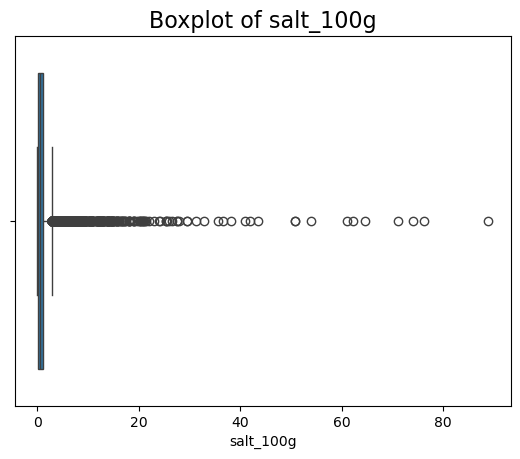

In [169]:
sns.boxplot(x=X['salt_100g'])
plt.title('Boxplot of salt_100g', fontsize=16)
plt.show()

Les outliers ne sont √† priori pas des valeurs aberrantes

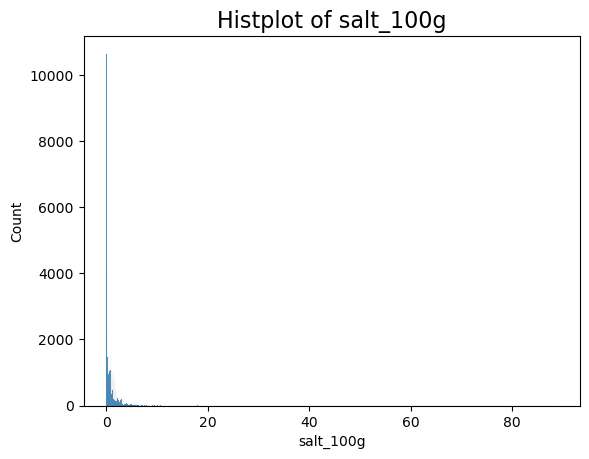

In [171]:
sns.histplot(data=X, x='salt_100g')
plt.title('Histplot of salt_100g', fontsize=16)
plt.show()

**Calculer les limites IQR**

In [173]:
# On calcule l'IQR (intervalle interquartile)
Q1 = X['salt_100g'].quantile(0.25)
Q3 = X['salt_100g'].quantile(0.75)
IQR = Q3 - Q1

# On calcule les limites
limite_basse = max(0, Q1 - 1.5 * IQR)
limite_haute = Q3 + 1.5 * IQR

print("limite basse :", limite_basse, "g")
print("limite haute :", limite_haute, "g")

limite basse : 0 g
limite haute : 2.8949999999999996 g


Il y a beaucoup de valeurs, mais par exemple le produit "sel" contient 100g de sel. Donc ce n'est pas incoh√©rent.
A ce stade, on ne peut identifier les valeurs aberrantes avec cette m√©thode.

### 2.8 - Feature "nutrition_grade_fr"

In [176]:
df['nutrition_grade_fr'].unique()

array(['e', 'b', 'd', 'c', 'a', nan], dtype=object)

Ces valeurs ne sont pas aberrantes

### 2.9 - Produits avec plus de 100g de nutriments

Si la somme des nutriments d'un produit est sup√©rieures √† 100g, cela signifierait qu'au moins une des valeur est aberrante.

**Rechercher les produits dont la somme des nutriments > 100g**

Pour la recherche je prends 102g comme limite √† cause des √©ventuels arrondis qui peuvent perturber la somme.

In [180]:
mask = (df['proteins_100g'] + df['fat_100g'] + df['carbohydrates_100g'] + df['salt_100g'] + df['fiber_100g']) > 102
df.loc[mask, ['code', 'product_name', 'proteins_100g', 'fat_100g', 'carbohydrates_100g', 'salt_100g', 'fiber_100g']]

code                            product_name  proteins_100g  \
35186   0038000045301                      Cracklin' Oat Bran           8.16   
12996   0016000275294                         Raisin Nut Bran           8.16   
170499  0884912003911                   Honey Bunches of Oats           6.25   
170514  0884912004710                       Grape-Nuts Cereal          10.30   
35204   0038000391200                             Froot Loops           3.45   
...               ...                                     ...            ...   
219398  3270160741199                            Poisson pan√©          13.00   
186936  2952350335784  Biscuit cru The Matcha - Fleur de coco           6.50   
11278   0014100097068                          Oatmeal Raisin           6.50   
300851  8000090004706           Premium Saiwa Crackers Salati          11.20   
230285  3390390001259     P√¢te √† tartiner Chocolade sans lait          13.10   

        fat_100g  carbohydrates_100g  salt_100g  fiber_100g  
35186      14.30                69.4     0.7000       12.20  
12996       6.12                81.6     1.1400       12.20  
170499      7.81                81.2     1.0700        6.25  
170514      1.72                81.0     1.1800       12.10  
35204       3.45                89.7     1.1800       10.30  
...          ...                 ...        ...         ...  
219398      9.30                11.0    74.0000        0.70  
186936     12.80                99.3     0.0200        8.90  
11278      14.50                74.2     0.7366        6.50  
300851     12.80                72.0     3.0400        3.20  
230285     45.30                38.0     0.0800        8.50  

[251 rows x 7 columns]

Comme il y a beaucoup de produits concern√©s, une recherche pour trouver la ou les valeurs erron√©es, prendrait trop de temps. Je vais donc supprimer ces lignes du dataset

In [182]:
df = df[~mask].copy()
df.shape

(55197, 162)

**Reg√©n√©rer la cible et les features**

In [184]:
# reg√©n√©rer la cible, les features
y, X = generate_target_and_features(df)
X.shape

(55197, 8)

In [185]:
y.shape

(55197,)

### 2.10 - Produits avec plus de 80% de valeurs manques

S'il y a trop de valeurs manquantes pour un produit, il sera plus difficile de trouver les vrais valeurs. Ces produits deviendrait des produits "artificiels" ayant au final les m√™mes caract√©ristiques.

**Rechercher les produits concern√©s:**

In [188]:
# Nombre total de colonnes
total_features = X.shape[1]

# colonnes √† compter
columns_to_check = ['energy_100g', 'proteins_100g', 'fat_100g', 'carbohydrates_100g', 'salt_100g', 'sugars_100g', 'saturated-fat_100g', 'nutrition_grade_fr']

# sous-ensemble du dataset
subset_df = df[columns_to_check]

# Seuil √† partir duquel on consid√®re qu'une ligne a 80% ou plus de valeurs manquantes
nb_nan_max = 0.8 * total_features

# Filtrer les lignes dont le nombre de valeurs manquantes est sup√©rieur ou √©gal au seuil
rows_with_80_percent_nan = df[subset_df.isnull().sum(axis=1) >= nb_nan_max]

print("nombre de produits concern√©s :", rows_with_80_percent_nan.shape[0])

nombre de produits concern√©s : 10257


Comme il y a beaucoup de produits concern√©s, on va supprimer ces produits du dataset

**Supprimer les produits concern√©s:**

In [190]:
# Identifier les index des lignes √† supprimer
rows_to_drop = subset_df[subset_df.isnull().sum(axis=1) >= nb_nan_max].index

# Supprimer ces lignes du DataFrame d'origine
df = df.drop(index=rows_to_drop)

**Reg√©n√©rer la cible et les features**

In [192]:
# reg√©n√©rer la cible, les features
y, X = generate_target_and_features(df)
X.shape

(44940, 8)

In [193]:
y.shape

(44940,)

## 3 - Identifier et traiter les valeurs manquantes

**Voici le pourcentage de valeurs manquantes par feature**

In [196]:
X_nan = X.isna().mean().sort_values()
X_nan

energy_100g           0.001780
proteins_100g         0.007499
fat_100g              0.042946
carbohydrates_100g    0.045105
salt_100g             0.055318
sugars_100g           0.058611
saturated-fat_100g    0.060681
nutrition_grade_fr    0.079884
dtype: float64

In [197]:
df_nan = df.loc[:,['energy_100g', 'proteins_100g', 'fat_100g', 'carbohydrates_100g', 'salt_100g', 'sugars_100g', 'saturated-fat_100g', 'nutrition_grade_fr']].isna().mean().sort_values()
df_nan

energy_100g           0.001780
proteins_100g         0.007499
fat_100g              0.042946
carbohydrates_100g    0.045105
salt_100g             0.055318
sugars_100g           0.058611
saturated-fat_100g    0.060681
nutrition_grade_fr    0.079884
dtype: float64

### 3.1 - Rechercher les corr√©lations entre les features

**Visualiser la matrice de corr√©lation entre les features quantitatives**

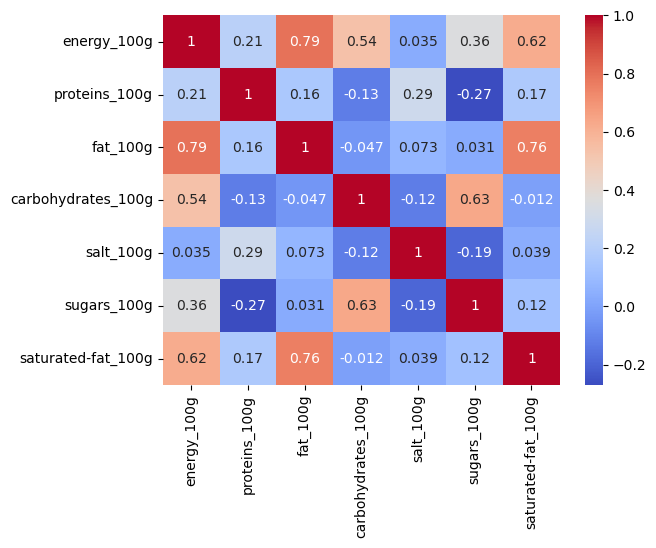

In [199]:
# Calculer la matrice de corr√©lation
list_quantitative_features = ['energy_100g', 'proteins_100g', 'fat_100g', 'carbohydrates_100g', 'salt_100g', 'sugars_100g', 'saturated-fat_100g']
correlation_matrix = X[list_quantitative_features].corr()

# Cr√©er une heatmap pour la matrice de corr√©lation
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Afficher la heatmap
plt.show()

On constate :
- une corr√©lation √©vidente entre "fat" et "saturated_fat", corr√©lation par d√©finition.
- une corr√©lation entre l'"energy" et "fat", et faible entre l'energy et "saturated_fat".
- une corr√©lation √©vidente entre les carohydrates et les sucres.
- une l√©g√®re corr√©lation entre l'energy et les carbohydrates.

**Visualiser les corr√©lations entre la feature nutrition_grade_fr et les features quantitatives**



In [202]:
# Cr√©er une fonction g√©n√©rique pour cr√©er et afficher les boxplots
def build_boxplot_with_y(y_indicator, x_indicator, df):
    df_sorted = df.sort_values(by=y_indicator, ascending=True)
    sns.boxplot(y=y_indicator, x=x_indicator, data=df_sorted)
    plt.title('Boxplot of ' + y_indicator + ' by ' + x_indicator, fontsize=16)
    plt.ylabel(y_indicator, fontsize=14, fontweight='bold')
    plt.xlabel(x_indicator, fontsize=14, fontweight='bold')
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)  
    plt.show()

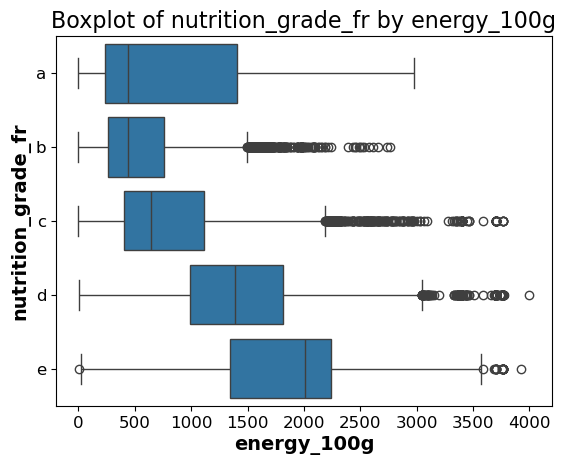

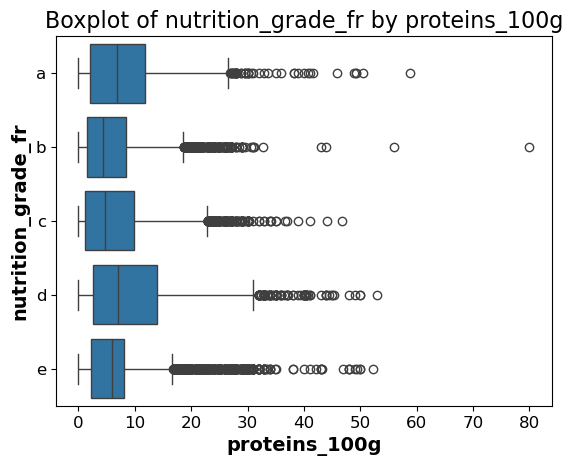

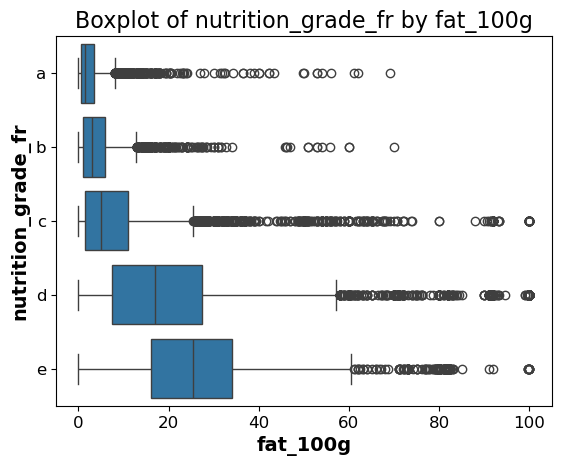

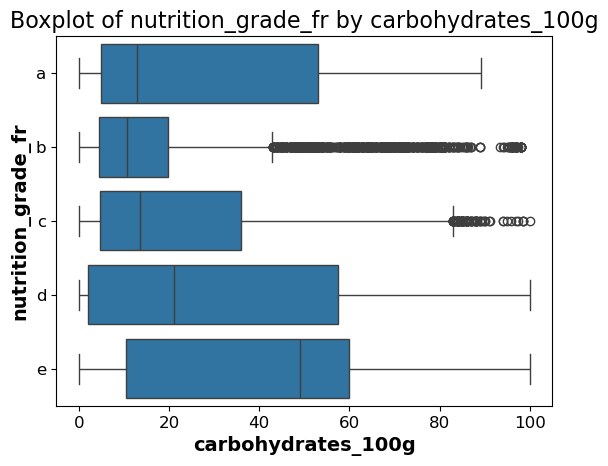

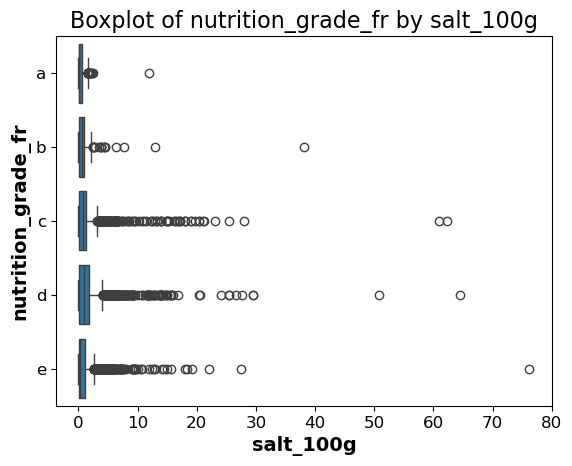

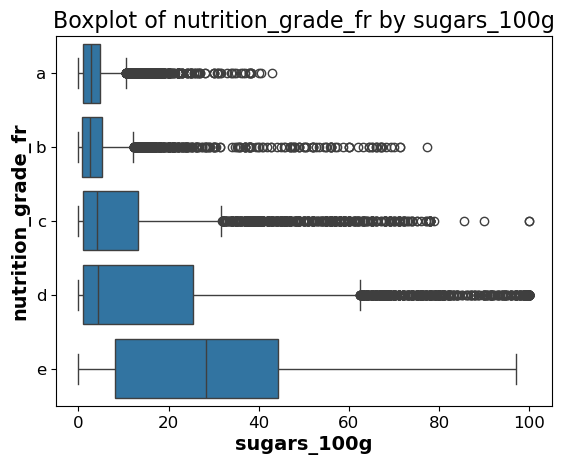

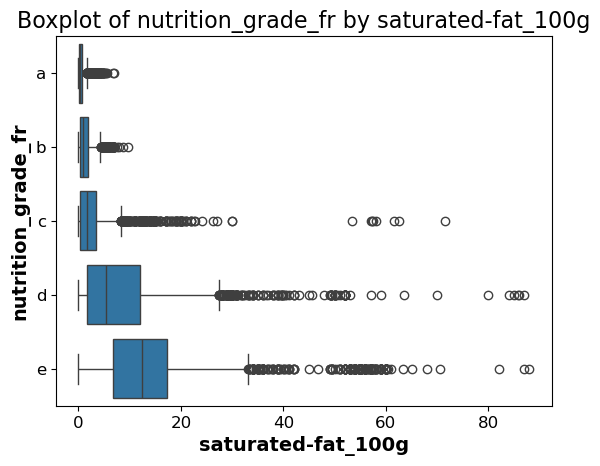

In [203]:
# Afficher les boxplots des features quantitatives par nutrition_grade_fr
for quantitative_feature in list_quantitative_features:
    build_boxplot_with_y('nutrition_grade_fr', quantitative_feature, X)

On observe une tr√®s forte corr√©lation entre la feature "nutrition_grade_fr" et la feature "energy". La m√©diane de l'energy varie fortement d'un nutrition_grade √† l'autre, ensuivant l'ordre de croissance a, b, c, d, e.
Il devrait √™tre possible de d√©terminer les valeurs manquantes du nutrition_grade √† partir de l'energy.

Combien de produits dont l'energy et nutrition_grade sont manquantes ?

In [205]:
mask = df['energy_100g'].isna() & df['nutrition_grade_fr'].isna()
sample = df.loc[mask, ['product_name', 'code', 'energy_100g', 'nutrition_grade_fr']]
print('Il y a', str(sample.shape[0]), "produits dont l'energy et nutrition_grade sont manquantes.")

Il y a 66 produits dont l'energy et nutrition_grade sont manquantes.


Il va donc falloir d√©terminer l'energy avant le nutrition_grade_fr.

### 3.2 - Visualiser la distribution des features

In [208]:
# Cr√©er une fonction pour construire et afficher les histogrammes
def build_histplot(df, x):
    sns.histplot(data=df, x=x)
    plt.title('Histplot of ' + x, fontsize=16)
    plt.xlabel(x, fontsize=14, fontweight='bold')
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)  
    plt.show()

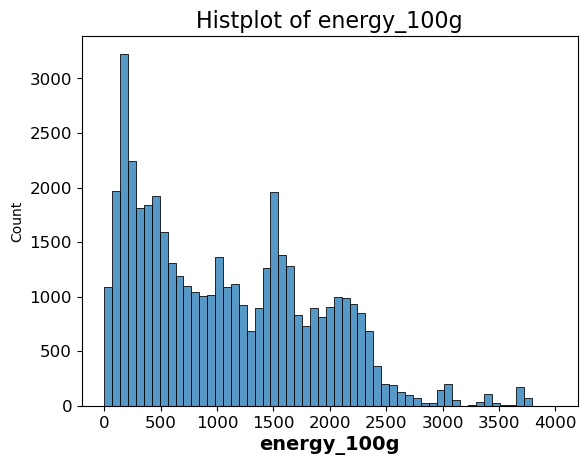

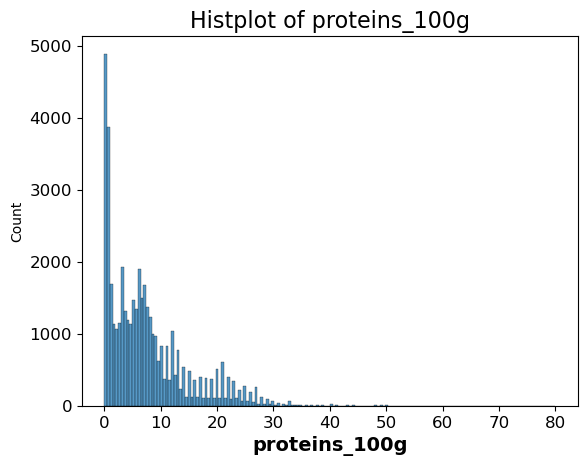

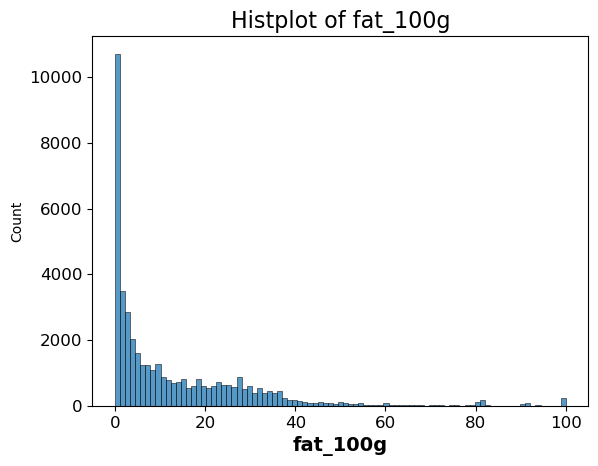

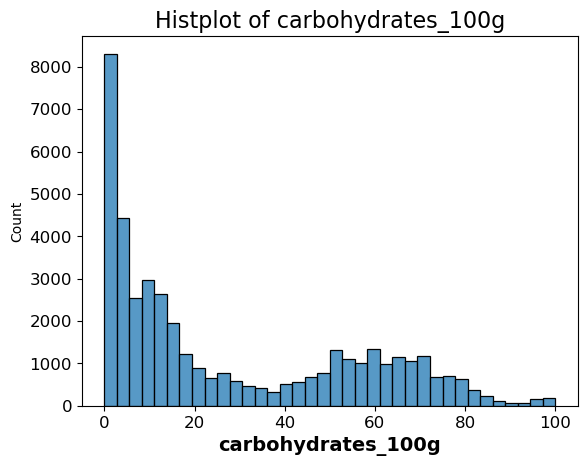

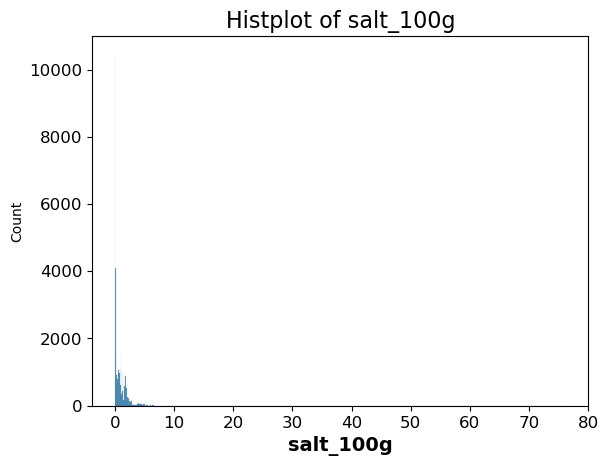

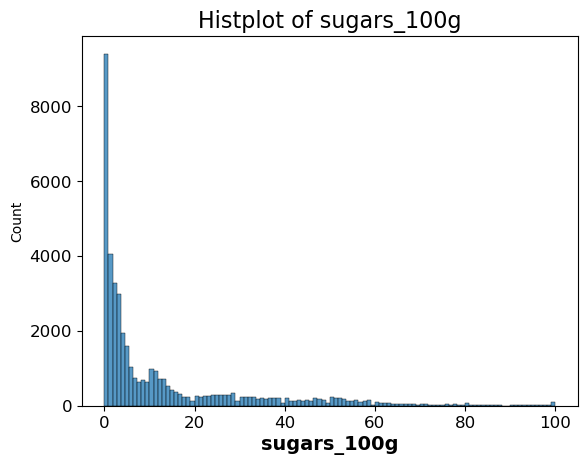

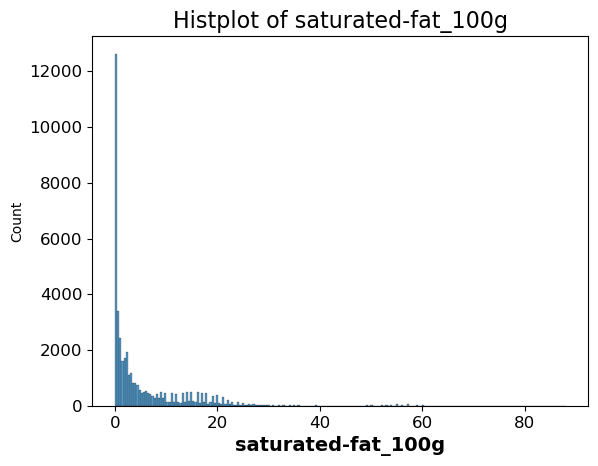

In [209]:
for quantitative_feature in list_quantitative_features:
    build_histplot(X, quantitative_feature)

Les distributions de toutes les features sont asym√©triques. La moyenne ne peut donc pas √™tre utilis√©e pour remplacer les valeurs manquantes.

### 3.3 - Traiter les valeurs manquantes de la feature "proteins"

Il y a tr√®s peu de valeurs manquantes pour cette feature. Elle n'est corr√©l√©e √† aucune autre variable. Comme sa distribution est asym√©trique, on peut utiliser la m√©diane.

**Calculer la m√©diane**

In [212]:
median = df['proteins_100g'].median()
print('La m√©diane pour la feature "proteins_100g" est:', median, 'g')

La m√©diane pour la feature "proteins_100g" est: 6.0 g


**Remplacer les valeurs manquantes par la m√©diane**

In [214]:
mask = df['proteins_100g'].isna()
print(df.loc[mask].shape)
df.loc[mask, 'proteins_100g'] = median

(337, 162)


In [215]:
print(df.loc[mask].shape)

(337, 162)


### 3.4 - Traiter les valeurs manquantes de la feature "salt"

Il y a 5,5 % de valeurs manquantes. Cette variable n'est correl√©e √† aucune autre, sa distribution est asym√©trique. Et il faut faire attention √† la pr√©sence de quelques outliers qui viennent biaiser la distribution. Par exemple le produit "sel" qui va contenir 100g de sel pour 100g de produit.

Je vais remplacer les valeurs manquantes par la m√©diane, mais avant je vais exclure du calcul les outliers.

**Cr√©er un √©chantillon de la variable "salt_100g" sans les plus forts outliers**

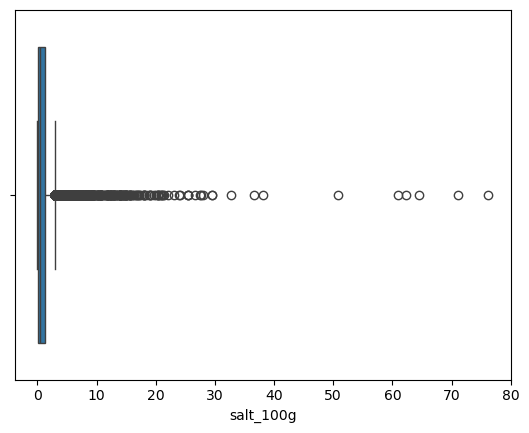

In [217]:
sns.boxplot(x='salt_100g', data=df)
plt.show()

D'apr√®s ChatGPT, certains produits peuvent atteindre 15g de sel pour 100g. Par exemple la sauce Soja.

Par cons√©quent je choisis de retirer les produits dont la quantit√© de sel est > 15g.

In [219]:
mask = df['salt_100g'] > 15
sample = df.loc[~mask]

Voici la boxplot apr√®s suppression des 60 produits

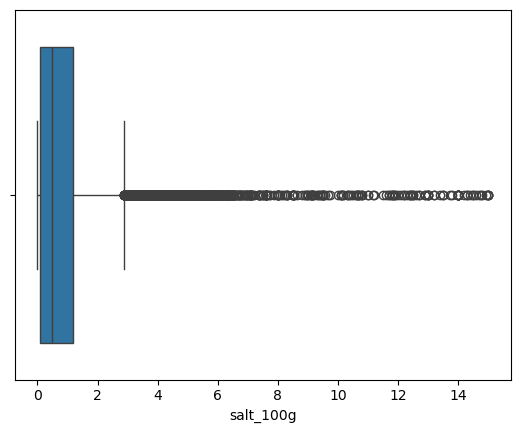

In [221]:
sns.boxplot(x='salt_100g', data=sample)
plt.show()

**Calculer la m√©diane de cet √©chantillon**

In [223]:
median = sample['salt_100g'].median()
print('La m√©diane pour la feature "salt_100g" est:', median, 'g')

La m√©diane pour la feature "salt_100g" est: 0.5 g


**Remplacer les valeurs manquantes par la m√©diane**

In [225]:
mask = df['salt_100g'].isna()
print(df.loc[mask].shape)
df.loc[mask, 'salt_100g'] = median

(2486, 162)


In [226]:
mask = df['salt_100g'].isna()
print(df.loc[mask].shape)

(0, 162)


### 3.5 - Traiter les valeurs manquantes des features "fat" et "saturated-fat"

Il y a 4% de valeurs manquantes pour "fat" et 6% pour "staruated-fat". "fat" est correl√©e aux features "energy", "saturated_fat", et 'nutrition_grade_fr'.

Il est int√©ressant d'utiliser ici l'outil IterativeImputer de la librairie Scikit-learn, notamment car elle est particuli√®rement utile lorsqu'il y a des valeurs manquantes dans plusieurs colonnes simultan√©ment.

**Remplacer les valeurs manquantes avec IterativeImputer**

In [228]:
# S√©lectionner les colonnes √† imputer
columns_to_impute = ['fat_100g', 'saturated-fat_100g']

# Extraire ces colonnes dans un nouveau DataFrame
df_to_impute = df[columns_to_impute]

# Cr√©er un objet IterativeImputer
imputer = IterativeImputer(random_state=0)

# Imputation des colonnes s√©lectionn√©es
imputed_data = imputer.fit_transform(df_to_impute)

# Convertir le r√©sultat en DataFrame
df_imputed = pd.DataFrame(imputed_data, columns=columns_to_impute).reset_index(drop=True)

# 3. R√©int√©grer les colonnes imput√©es dans le DataFrame original
df.reset_index(drop=True, inplace=True)
df[columns_to_impute] = df_imputed

In [229]:
print(df_imputed[['fat_100g', 'saturated-fat_100g']])

        fat_100g  saturated-fat_100g
0       2.500000            1.200000
1       3.000000            1.200000
2       3.000000            1.400000
3       3.000000            1.400000
4       2.200000            0.600000
...          ...                 ...
44935  13.086045            5.358062
44936  13.086045            5.358062
44937  99.900000           37.962320
44938   1.200000            0.894083
44939  13.086045            5.358062

[44940 rows x 2 columns]


In [230]:
df.reset_index(drop=True, inplace=True)
df_copie = df.copy()
df_copie.shape
df_copie[['fat_100g', 'saturated-fat_100g']] = df_imputed[['fat_100g', 'saturated-fat_100g']]

df_nan = df_copie.loc[:,['energy_100g', 'proteins_100g', 'fat_100g', 'carbohydrates_100g', 'salt_100g', 'sugars_100g', 'saturated-fat_100g', 'nutrition_grade_fr']].isna().mean().sort_values()
df_nan

proteins_100g         0.000000
fat_100g              0.000000
salt_100g             0.000000
saturated-fat_100g    0.000000
energy_100g           0.001780
carbohydrates_100g    0.045105
sugars_100g           0.058611
nutrition_grade_fr    0.079884
dtype: float64

In [231]:
df_nan = df.loc[:,['energy_100g', 'proteins_100g', 'fat_100g', 'carbohydrates_100g', 'salt_100g', 'sugars_100g', 'saturated-fat_100g', 'nutrition_grade_fr']].isna().mean().sort_values()
df_nan

proteins_100g         0.000000
fat_100g              0.000000
salt_100g             0.000000
saturated-fat_100g    0.000000
energy_100g           0.001780
carbohydrates_100g    0.045105
sugars_100g           0.058611
nutrition_grade_fr    0.079884
dtype: float64

On voit bien qu'il n'y a plus de valeurs manquantes pour "fat" et "saturated-fat".

In [233]:
print(df_to_impute.isna().sum())

fat_100g              1930
saturated-fat_100g    2727
dtype: int64


In [234]:
print(df_imputed.isna().sum())

fat_100g              0
saturated-fat_100g    0
dtype: int64


In [235]:
df_imputed.shape

(44940, 2)

### 3.6 - Traiter les valeurs manquantes des features "carbohydrates" et "sugars"

Il y a 4,5% de valeurs manquantes pour "carbohydrates" et 5,8% pour "sugars". "carbohydrates" et "sugars" sont correl√©es.

Il est int√©ressant d'utiliser ici l'outil IterativeImputer de la librairie Scikit-learn, car elle est particuli√®rement utile lorsqu'il y a des valeurs manquantes dans plusieurs colonnes simultan√©ment.

**Remplacer les valeurs manquantes avec IterativeImputer**

In [237]:
# S√©lectionner les colonnes √† imputer
columns_to_impute = ['carbohydrates_100g', 'sugars_100g']

# Extraire ces colonnes dans un nouveau DataFrame
df_to_impute = df[columns_to_impute]

# Cr√©er un objet IterativeImputer
imputer = IterativeImputer(random_state=0)

# Imputation des colonnes s√©lectionn√©es
imputed_data = imputer.fit_transform(df_to_impute)

# Convertir le r√©sultat en DataFrame
df_imputed = pd.DataFrame(imputed_data, columns=columns_to_impute).reset_index(drop=True)

# 3. R√©int√©grer les colonnes imput√©es dans le DataFrame original
df.reset_index(drop=True, inplace=True)
df[columns_to_impute] = df_imputed

In [238]:
df_nan = df.loc[:,['energy_100g', 'proteins_100g', 'fat_100g', 'carbohydrates_100g', 'salt_100g', 'sugars_100g', 'saturated-fat_100g', 'nutrition_grade_fr']].isna().mean().sort_values()
df_nan

proteins_100g         0.000000
fat_100g              0.000000
carbohydrates_100g    0.000000
salt_100g             0.000000
sugars_100g           0.000000
saturated-fat_100g    0.000000
energy_100g           0.001780
nutrition_grade_fr    0.079884
dtype: float64

### 3.7 - Traiter les valeurs manquantes de l'energy

Il y a 0.001 % de valeurs manquantes pour l'energy. Par d√©finition, l'energy en kjoules est d√©termin√©e par la formule suivante : energy = 17 *proteins + 37 * fat + 17 * carbohydrates

On peut donc calculer les valeurs manquantes de l'energy en utilisant la formule ci-dessus.

**Remplacer les valeurs manquantes par la formule : energy = 17 x proteins + 37 x fat + 17 x carbohydrates**

In [240]:
mask = df['energy_100g'].isna()
df.loc[mask, 'energy_100g'] = 17 * df['proteins_100g'] + 17 * df['carbohydrates_100g'] + 37 * df['fat_100g'] 

In [241]:
df_nan = df.loc[:,['energy_100g', 'proteins_100g', 'fat_100g', 'carbohydrates_100g', 'salt_100g', 'sugars_100g', 'saturated-fat_100g', 'nutrition_grade_fr']].isna().mean().sort_values()
df_nan

energy_100g           0.000000
proteins_100g         0.000000
fat_100g              0.000000
carbohydrates_100g    0.000000
salt_100g             0.000000
sugars_100g           0.000000
saturated-fat_100g    0.000000
nutrition_grade_fr    0.079884
dtype: float64

### 3.8 - Traiter les valeurs manquantes de "nutrition_grade_fr"

Il y a 7,9% de valeurs manquantes. Il s'agit d'une variable cat√©gorielle, qui n√©cessite une approche diff√©rente des variables pr√©c√©dentes. On a vu qu'elle l'energy, les carbohydrates, et fat, se dispersaient diff√©remment selon la valeur du nutrition_grade. Cela sous-entend une corr√©lation, entre le nutrition_grade et ces variables quantitatives. 

Il serait int√©ressant ici d'utiliser l'imputation KNN (voisin le plus proche) pour remplacer les valeurs manquantes.

**Remplacer les valeurs manquantes avec KNN**

In [243]:
# Convertir les cat√©gories en entiers
label_encoder = LabelEncoder()
df['nutrition_grade_fr_encoded'] = label_encoder.fit_transform(df['nutrition_grade_fr'].astype(str))

# Inclure toutes les colonnes dans l'imputation, y compris les colonnes num√©riques et 'nutrition_grade_fr_encoded'
#columns_to_impute = ['energy_100g', 'proteins_100g', 'fat_100g', 'carbohydrates_100g', 'salt_100g', 'sugars_100g', 'saturated-fat_100g', 'nutrition_grade_fr_encoded']

# Imputation avec KNN
#imputer = KNNImputer(n_neighbors=5)

# Imputation des valeurs manquantes en utilisant toutes les colonnes sp√©cifi√©es
#df_imputed = imputer.fit_transform(df[columns_to_impute])

# Convertir le r√©sultat en DataFrame avec les m√™mes colonnes
#df_imputed = pd.DataFrame(df_imputed, columns=columns_to_impute).reset_index(drop=True)

# Reconversion de 'nutrition_grade_fr_encoded' en cat√©gories
#df_imputed['nutrition_grade_fr'] = label_encoder.inverse_transform(df_imputed['nutrition_grade_fr_encoded'].round().astype(int))

# 3. R√©int√©grer les colonnes imput√©es dans le DataFrame original
#df.reset_index(drop=True, inplace=True)
#df['nutrition_grade_fr'] = df_imputed['nutrition_grade_fr']

In [269]:
df['nutrition_grade_fr'].unique()

array(['e', 'b', 'c', 'a', 'd', nan], dtype=object)

In [245]:
df.shape

(44940, 163)

In [246]:
df_nan = df.loc[:,['energy_100g', 'proteins_100g', 'fat_100g', 'carbohydrates_100g', 'salt_100g', 'sugars_100g', 'saturated-fat_100g', 'nutrition_grade_fr']].isna().mean().sort_values()
df_nan

energy_100g           0.000000
proteins_100g         0.000000
fat_100g              0.000000
carbohydrates_100g    0.000000
salt_100g             0.000000
sugars_100g           0.000000
saturated-fat_100g    0.000000
nutrition_grade_fr    0.079884
dtype: float64



### 3.9 - Reg√©n√©rer la cible et les features

In [248]:
# reg√©n√©rer la cible, les features
y, X = generate_target_and_features(df)
X.shape

(44940, 8)

In [249]:
y.shape

(44940,)

## 4 - Effectuer les analyses uni-vari√©es et bi-vari√©es

### 4.1 - Analyses uni-vari√©es

##### 4.1.1 - Energy

**Visualiser la distribution**

En kj


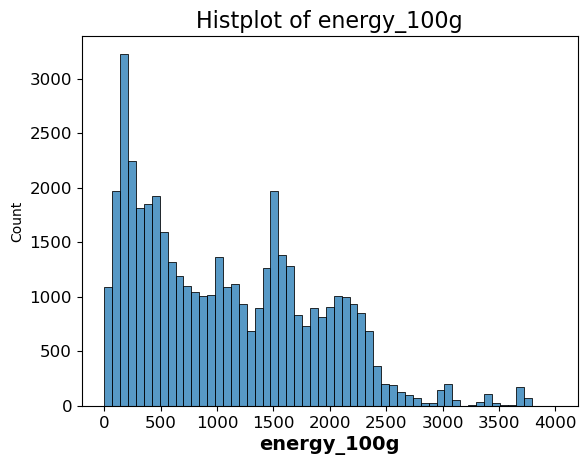

In [254]:
print('En kj')
build_histplot(X, 'energy_100g')

La distribution est bimodale : 
- Le pic le plus haut se situe autour de 200 kj, avec plus de 3 000 produits.
- Un pic autour de 1500 kj, avec pr√®s de 2 000 produits.

Les donn√©es pr√©sentent une asym√©trie √† droite (concentration √† gauche des valeurs - √©talement √† droite)

In [256]:
# Cr√©er une fonction g√©n√©rique pour cr√©er et afficher les boxplots
def build_boxplot(x_indicator, df, xlabel):
    sns.boxplot(x=x_indicator, data=df)
    plt.title('Boxplot of ' + x_indicator, fontsize=16)
    #plt.ylabel(y_indicator, fontsize=14, fontweight='bold')
    plt.xlabel(xlabel, fontsize=14, fontweight='bold')
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)  
    plt.show()

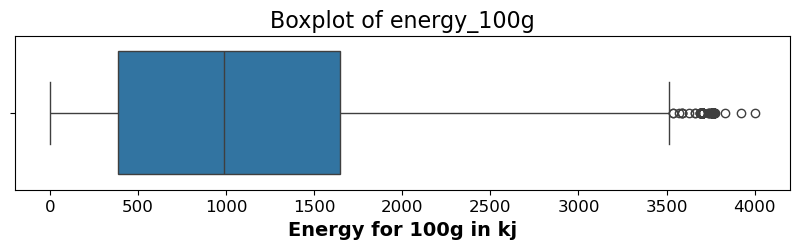

In [257]:
plt.figure(figsize=(10, 2))
build_boxplot('energy_100g', df, 'Energy for 100g in kj')

La m√©diane est centr√©e dans la bo√Æte, mais il y a une forte pr√©sence d'outliers au del√† de 3500 kj.

**Mesurer la tendance centrale**

Choix de la bonne mesure:
- Moyenne : √Ä utiliser si la distribution est sym√©trique et qu'il n'y a pas de valeurs aberrantes.
- M√©diane : Pr√©f√©rable si la distribution est asym√©trique ou si tu as des valeurs aberrantes.
- Mode : Utile pour les donn√©es cat√©gorielles ou pour identifier la valeur la plus fr√©quente.

Calculer la m√©diane :

In [260]:
# Calcul de la m√©diane
median = X['energy_100g'].median()
print("La m√©diane est :", median, "kj")

La m√©diane est : 989.0 kj


**Mesurer la dispersion**

Calculer le coefficient de variation

In [262]:
coef_variation = X['energy_100g'].std() / X['energy_100g'].mean()
print("Le coefficient de variation vaut", round(coef_variation * 100, 2), '%')

Le coefficient de variation vaut 72.01 %


Le coefficient de variation montre une grande dispersion autour de la moyenne. Rappel :
- CV < 10% : Faible variabilit√©, les valeurs sont assez coh√©rentes.
- 10% < CV < 30% : Variabilit√© mod√©r√©e.
- CV > 30% : Haute variabilit√©, les valeurs montrent une grande dispersion autour de la moyenne.

**Mesurer la forme**

Calculer le skewness empirique

In [265]:
skewness = X['energy_100g'].skew()
print("Le skewness vaut", round(skewness, 2))

Le skewness vaut 0.59


Le skewness est positif, ce qui confirme l'asym√©trie avec √©talement √† droite.

##### 4.1.1 - Cible

In [268]:
COMMENCER L'ANALYSE PAR LA CIBLE

ATTENTION PROBLEME AVEC DES NAN SUR LA VARIABLE nutrition_grade_fr

SyntaxError: unterminated string literal (detected at line 1) (3082769698.py, line 1)

In [ ]:
mask = df['nutrition_grade_fr'] == 'nan'
print(df.loc[mask, 'nutrition_grade_fr'])

In [ ]:
df['nutrition_grade_fr'].unique()

In [ ]:
df_imputed['nutrition_grade_fr'].unique()

In [ ]:
#from pandas.plotting import scatter_matrix
#scatter_matrix(X,figsize=(15,15))
#plt.show()

In [ ]:
#sns.set(style="ticks", color_codes=True)
#sns.pairplot(X, hue="nutrition_grade_fr")

## 5 - R√©aliser une analyse multi-vari√©e

## 6 - RGPD